In [63]:
import pandas as pd

# Replace 'path_to_your_csv_file.csv' with the actual path to your CSV file
df = pd.read_csv('./marketing_campaign.csv')

In [64]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   I                  2240 non-null   int64  
 1   ID                 2240 non-null   int64  
 2   Year_Birth         2240 non-null   int64  
 3   Education          2240 non-null   object 
 4   Marital_Status     2240 non-null   object 
 5   Income             2017 non-null   float64
 6   Kidhome            2240 non-null   int64  
 7   Teenhome           2240 non-null   int64  
 8   Dt_Customer        2240 non-null   object 
 9   Recency            2240 non-null   int64  
 10  MntCoffee          2035 non-null   float64
 11  MntFruits          2240 non-null   int64  
 12  MntMeatProducts    2240 non-null   int64  
 13  MntFishProducts    2240 non-null   int64  
 14  MntSweetProducts   2240 non-null   int64  
 15  MntGoldProds       2227 non-null   float64
 16  NumWebVisitsMonth  2040 

In [65]:
df.describe()

,I,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoffee,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Complain,NumPurchases,UsedCampaignOffer
count,2240.000000,2240.000000,2240.000000,2017.000000,2240.000000,2240.000000,2240.000000,2035.000000,2240.000000,2240.000000,2240.000000,2240.000000,2227.000000,2040.000000,2240.000000,2240.000000,2240.000000
mean,1119.500000,5592.159821,1968.805804,52297.080317,0.437946,0.506250,49.109375,304.239312,26.302232,166.950000,37.525446,27.062946,43.847777,5.326961,0.009375,14.862054,0.271875
std,646.776623,3246.662198,11.984069,25543.108215,0.563666,0.544538,28.962453,337.515534,39.773434,225.715373,54.628979,41.280498,51.897098,2.439349,0.096391,7.677173,0.445025
min,0.000000,0.000000,1893.000000,2447.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,559.750000,2828.250000,1959.000000,35340.000000,0.000000,0.000000,24.000000,23.000000,1.000000,16.000000,3.000000,1.000000,9.000000,3.000000,0.000000,8.000000,0.000000
50%,1119.500000,5458.500000,1970.000000,51369.000000,0.000000,0.000000,49.000000,177.000000,8.000000,67.000000,12.000000,8.000000,24.000000,6.000000,0.000000,15.000000,0.000000
75%,1679.250000,8427.750000,1977.000000,68316.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.000000,50.000000,33.000000,56.000000,7.000000,0.000000,21.000000,1.000000
max,2239.000000,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,20.000000,1.000000,44.000000,1.000000


In [66]:
missing_count = df.isnull().sum()

missing_percentage = (df.isnull().sum() * 100) / len(df)

missing_values_df = pd.DataFrame({
    'Missing Values': missing_count,
    'Percentage of Total': missing_percentage
})

display(missing_values_df)

,Missing Values,Percentage of Total
I,0,0.000000
ID,0,0.000000
Year_Birth,0,0.000000
Education,0,0.000000
Marital_Status,0,0.000000
Income,223,9.955357
Kidhome,0,0.000000
Teenhome,0,0.000000
Dt_Customer,0,0.000000
Recency,0,0.000000


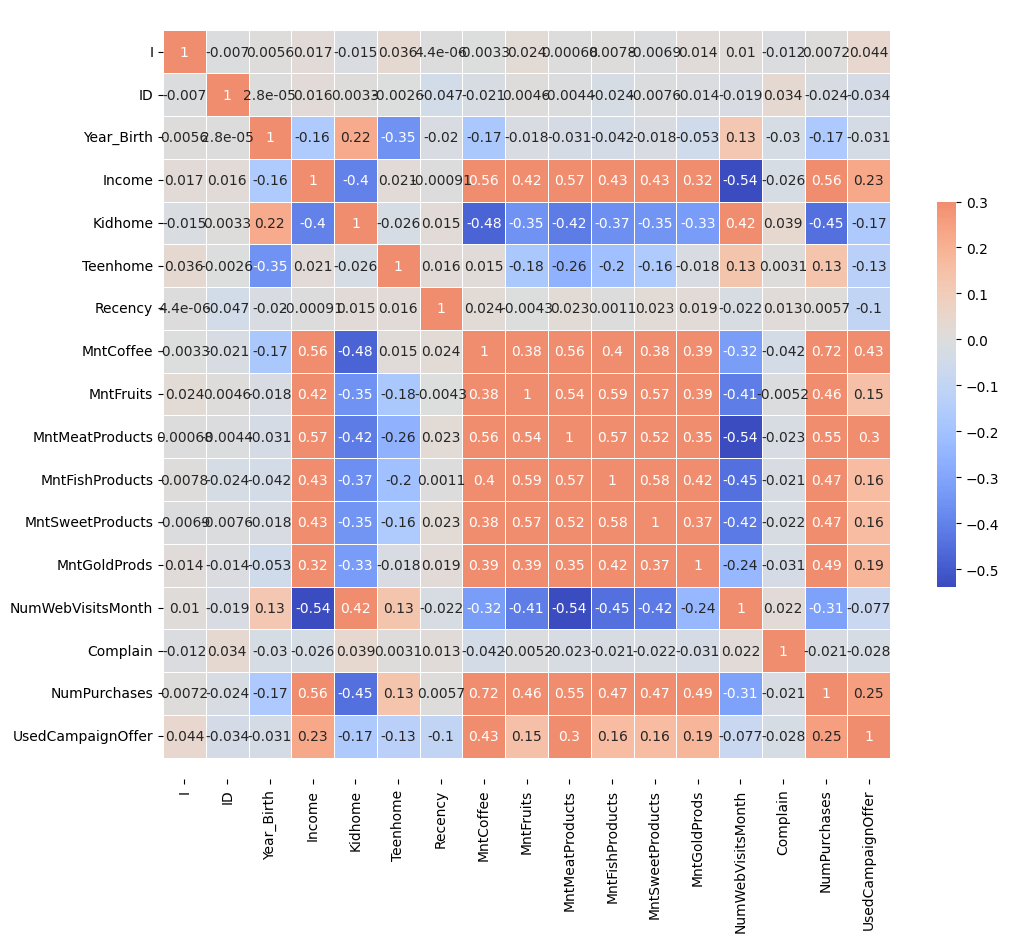

In [67]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)

corr = numeric_df.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(corr, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Fix for matplotlib issue
plt.ylim(plt.ylim()[0] + 0.5, plt.ylim()[1] - 0.5)

# Show the plot
plt.show()

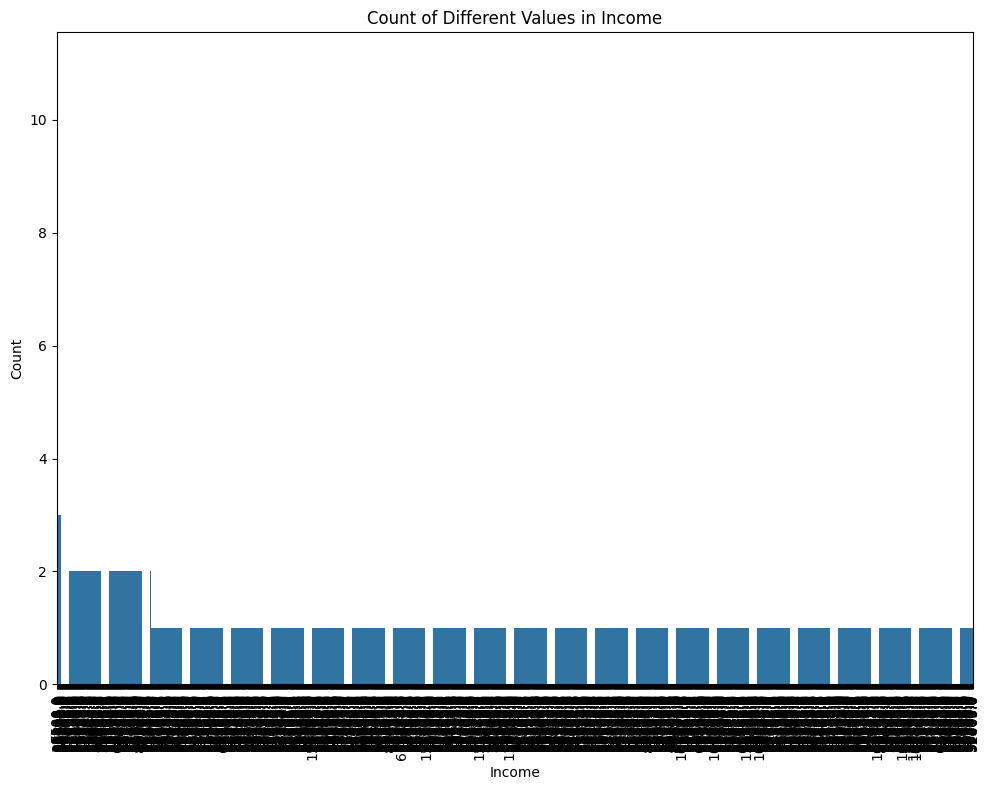

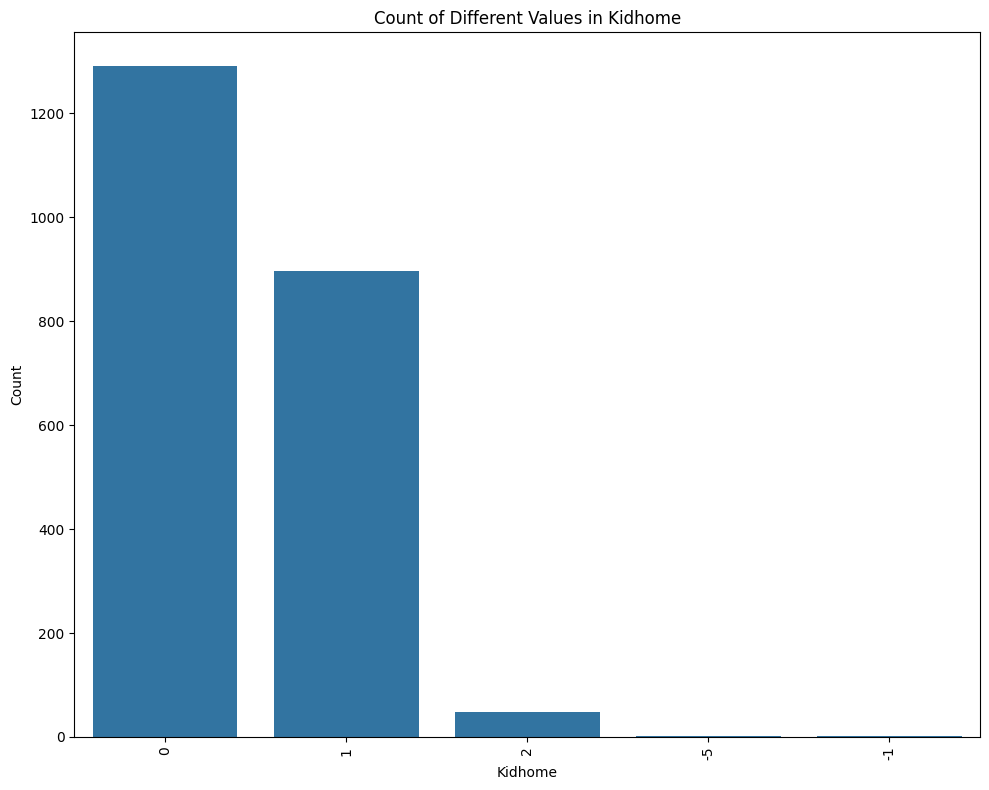

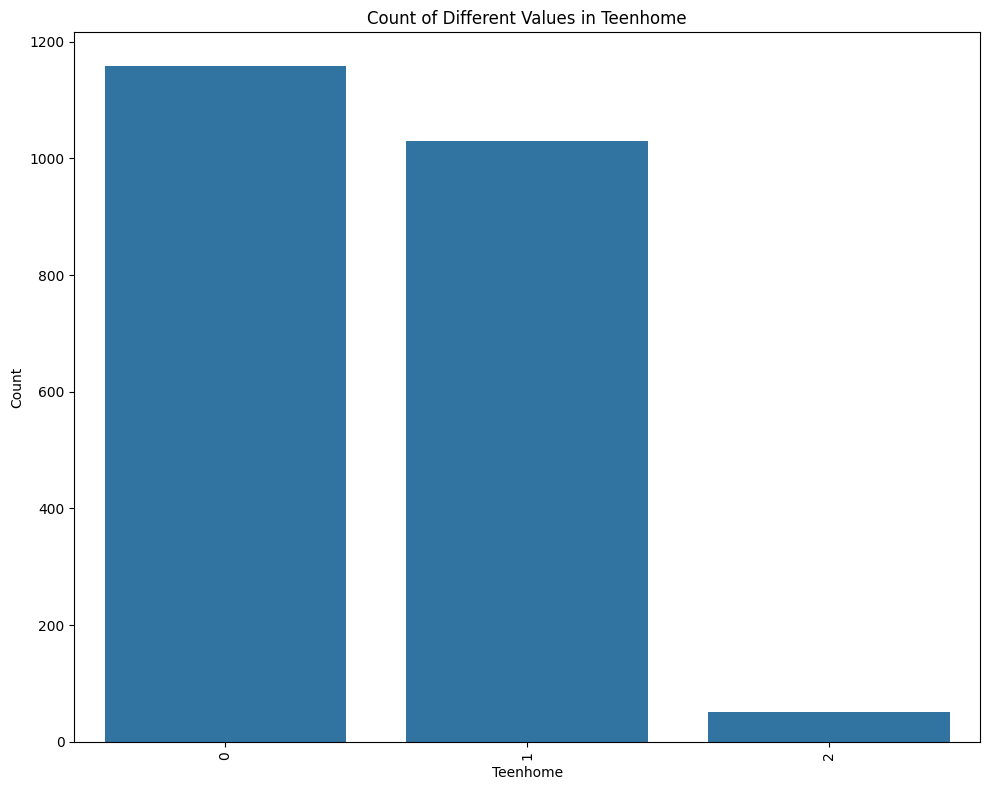

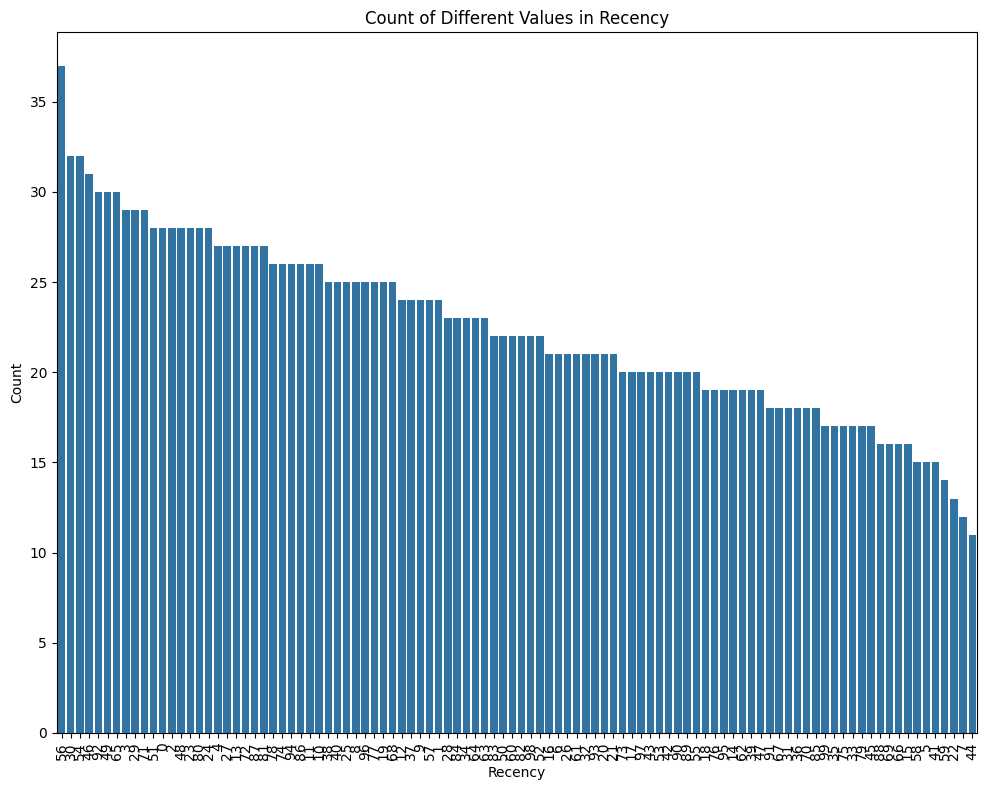

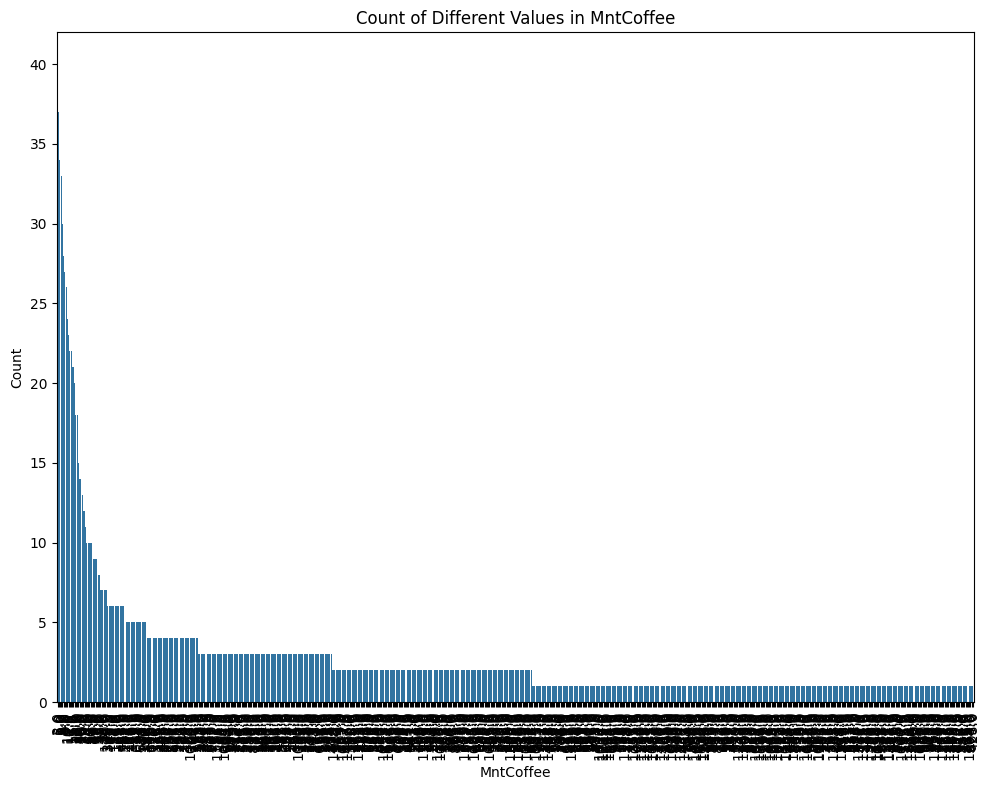

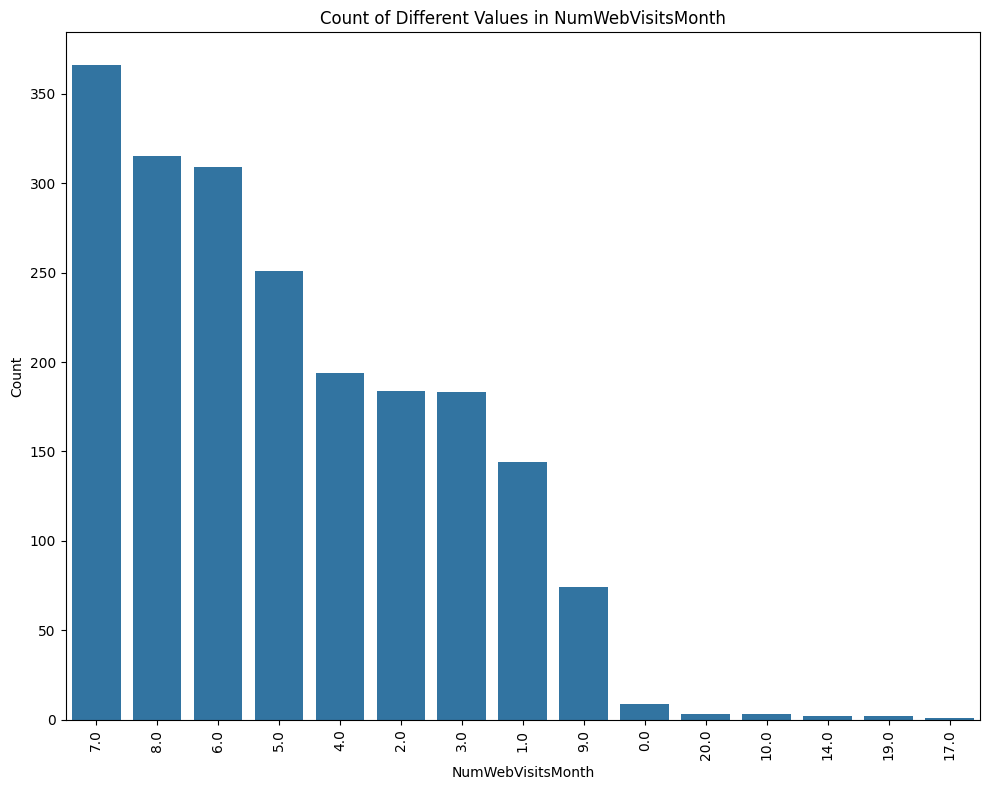

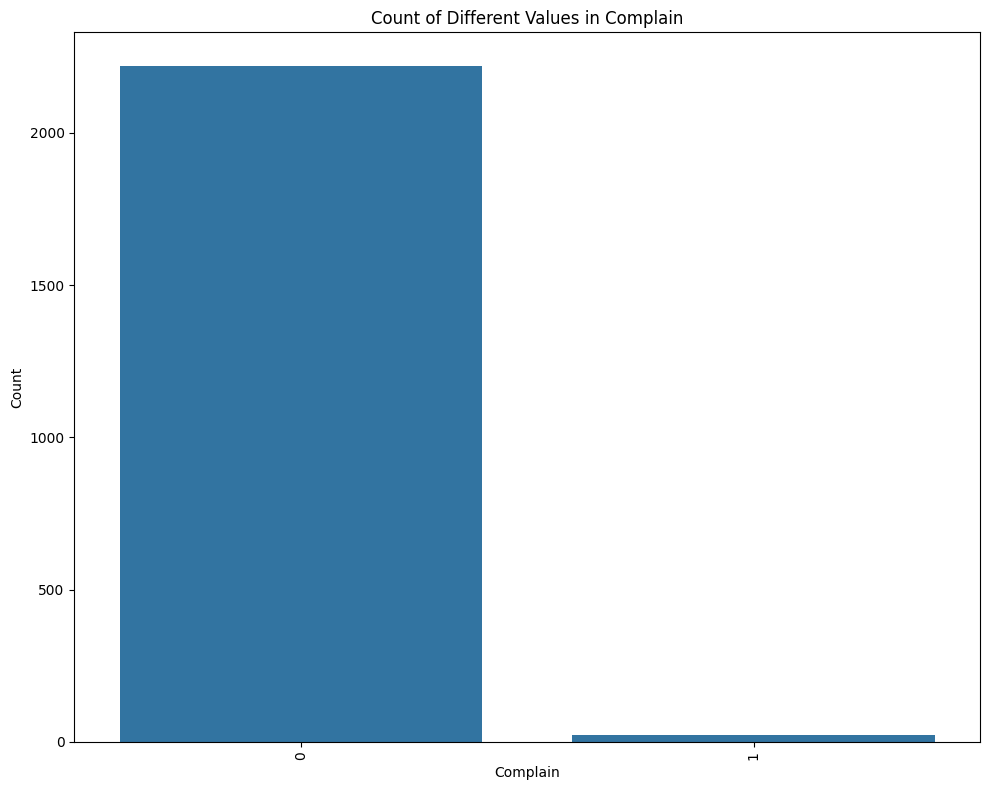

In [68]:
def plot_feature_value_counts(df, feature_column):
    
    if feature_column not in df.columns:
        raise ValueError(f"The feature '{feature_column}' does not exist in the DataFrame.")
        
    plt.figure(figsize=(10, 8))

    sns.countplot(x=feature_column, data=df, order = df[feature_column].value_counts().index)

    plt.title(f'Count of Different Values in {feature_column}')
    plt.xlabel(f'{feature_column}')
    plt.ylabel('Count')

    plt.xticks(rotation=90)  # Adjust rotation angle as needed

    plt.tight_layout()  
    plt.show()
    
plot_feature_value_counts(df , 'Income')
plot_feature_value_counts(df , 'Kidhome')
plot_feature_value_counts(df , 'Teenhome')
plot_feature_value_counts(df , 'Recency')
plot_feature_value_counts(df , 'MntCoffee')
plot_feature_value_counts(df , 'NumWebVisitsMonth')
plot_feature_value_counts(df , 'Complain')

In [69]:
def plot_feature_relationship(df, target_feature, other_feature):
    
    if target_feature not in df.columns:
        raise ValueError(f"The target feature '{target_feature}' does not exist in the DataFrame.")
    if other_feature not in df.columns:
        raise ValueError(f"The other feature '{other_feature}' does not exist in the DataFrame.")
    
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=df[other_feature], y=df[target_feature])
    plt.title(f'Scatter Plot: {target_feature} vs {other_feature}')
    
    plt.subplot(1, 2, 2)
    plt.hexbin(df[other_feature], df[target_feature], gridsize=30, cmap='Blues')
    plt.colorbar()
    plt.title(f'Hexbin Plot: {target_feature} vs {other_feature}')
    plt.xlabel(other_feature)
    plt.ylabel(target_feature)
    
    plt.show()

In [70]:
df_cleaned = df[(df['Income'].isnull()) | (np.abs(df['Income'] - df['Income'].mean()) <= (3*df['Income'].std()))]
df_cleaned = df_cleaned[(df_cleaned['Recency'].isnull()) | (np.abs(df_cleaned['Recency'] - df_cleaned['Recency'].mean()) <= (3*df_cleaned['Recency'].std()))]
df_cleaned = df_cleaned[(df_cleaned['MntCoffee'].isnull()) | (np.abs(df_cleaned['MntCoffee'] - df_cleaned['MntCoffee'].mean()) <= (3*df_cleaned['MntCoffee'].std()))]
df_cleaned = df_cleaned[(df_cleaned['MntFruits'].isnull()) | (np.abs(df_cleaned['MntFruits'] - df_cleaned['MntFruits'].mean()) <= (3*df_cleaned['MntFruits'].std()))]
df_cleaned = df_cleaned[(df_cleaned['MntMeatProducts'].isnull()) | (np.abs(df_cleaned['MntMeatProducts'] - df_cleaned['MntMeatProducts'].mean()) <= (3*df_cleaned['MntMeatProducts'].std()))]
df_cleaned = df_cleaned[(df_cleaned['MntFishProducts'].isnull()) | (np.abs(df_cleaned['MntFishProducts'] - df_cleaned['MntFishProducts'].mean()) <= (3*df_cleaned['MntFishProducts'].std()))]
df_cleaned = df_cleaned[(df_cleaned['MntSweetProducts'].isnull()) | (np.abs(df_cleaned['MntSweetProducts'] - df_cleaned['MntSweetProducts'].mean()) <= (3*df_cleaned['MntSweetProducts'].std()))]
df_cleaned = df_cleaned[(df_cleaned['MntGoldProds'].isnull()) | (np.abs(df_cleaned['MntGoldProds'] - df_cleaned['MntGoldProds'].mean()) <= (3*df_cleaned['MntGoldProds'].std()))]
df_cleaned = df_cleaned[(df_cleaned['NumWebVisitsMonth'].isnull()) | (np.abs(df_cleaned['NumWebVisitsMonth'] - df_cleaned['NumWebVisitsMonth'].mean()) <= (3*df_cleaned['NumWebVisitsMonth'].std()))]
df_cleaned = df_cleaned[(df_cleaned['NumPurchases'].isnull()) | (np.abs(df_cleaned['NumPurchases'] - df_cleaned['NumPurchases'].mean()) <= (3*df_cleaned['NumPurchases'].std()))]



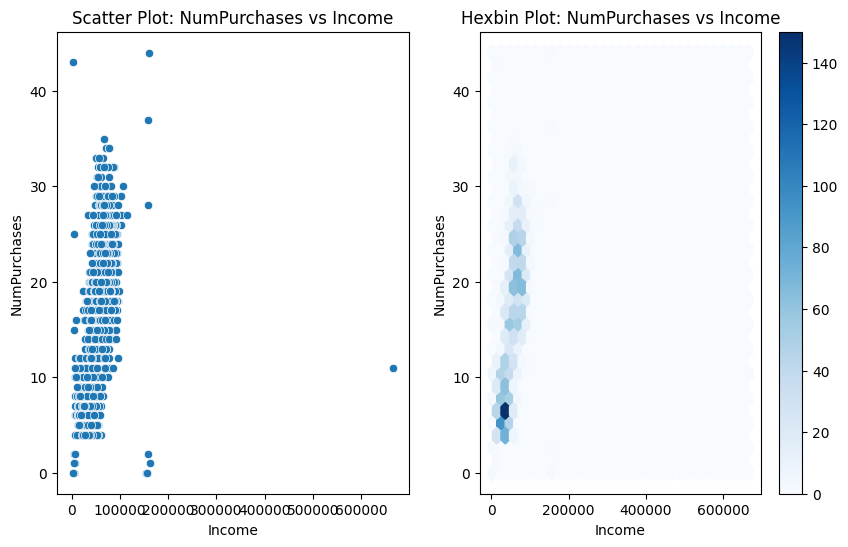

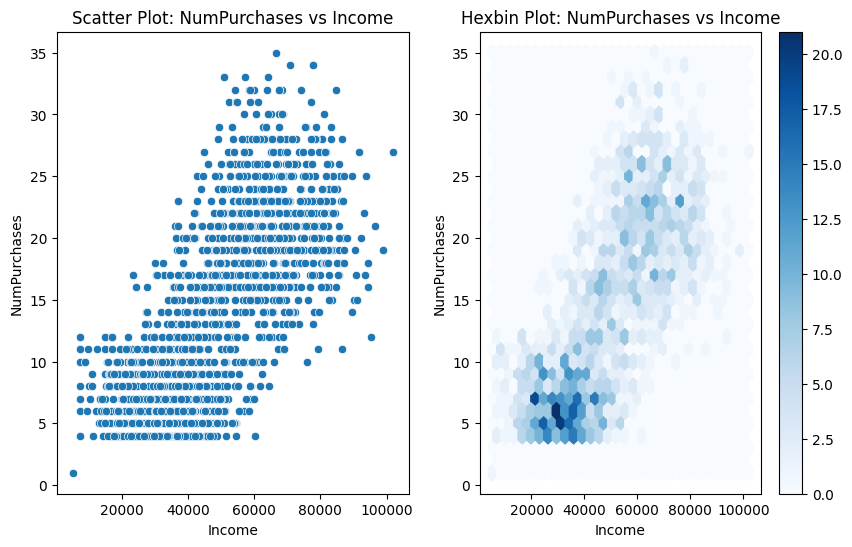

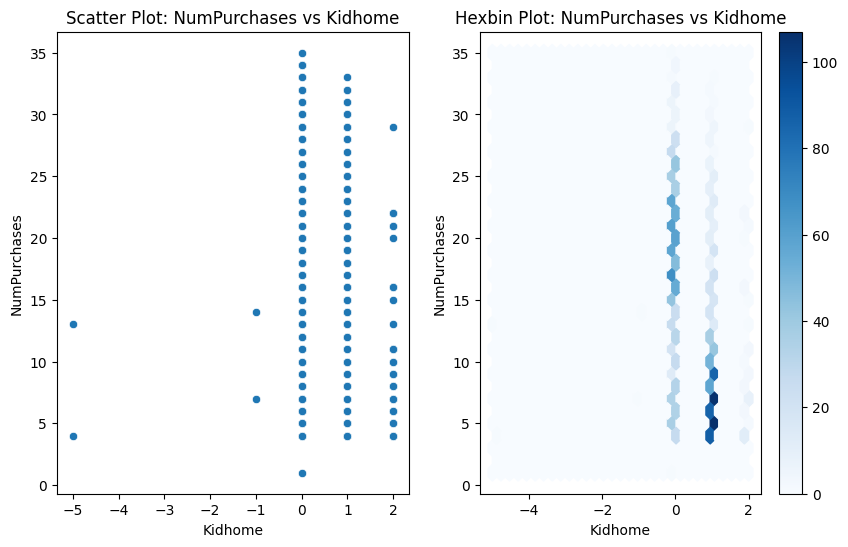

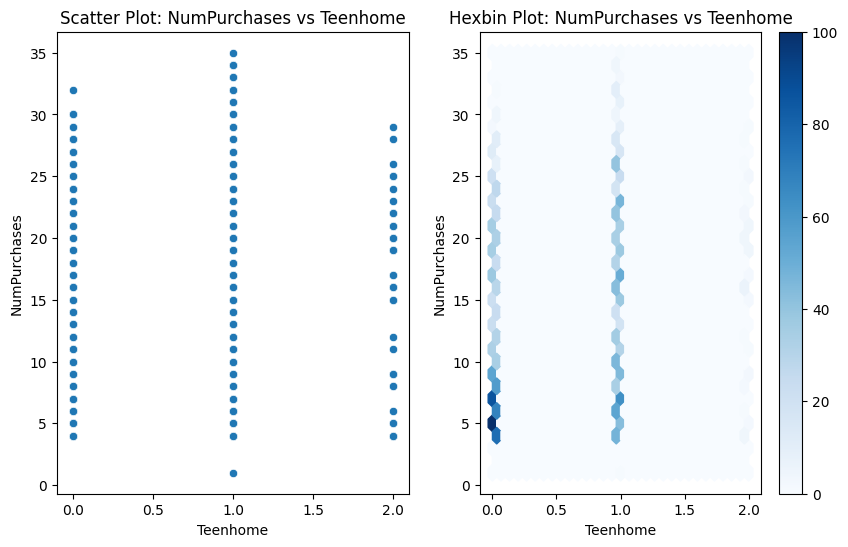

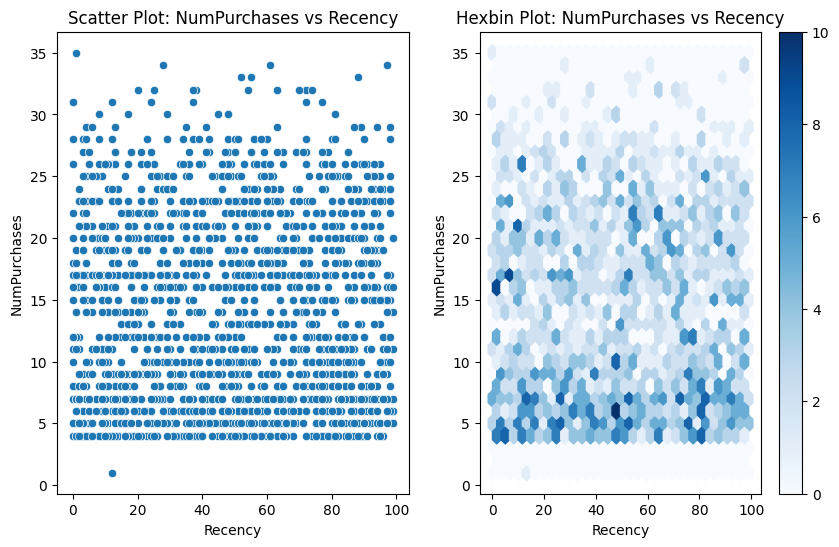

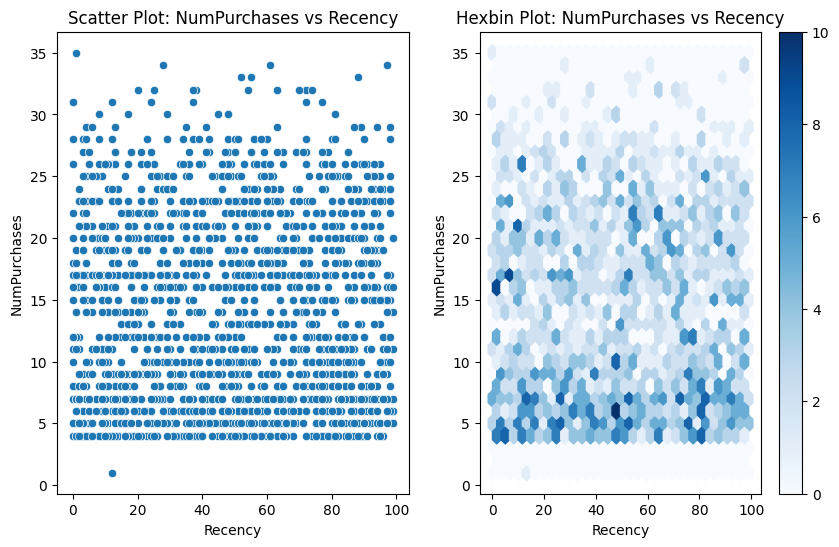

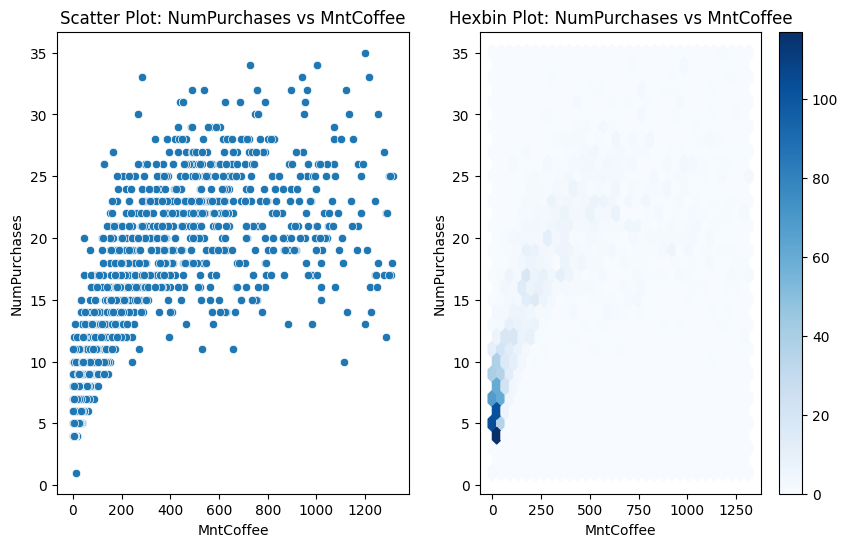

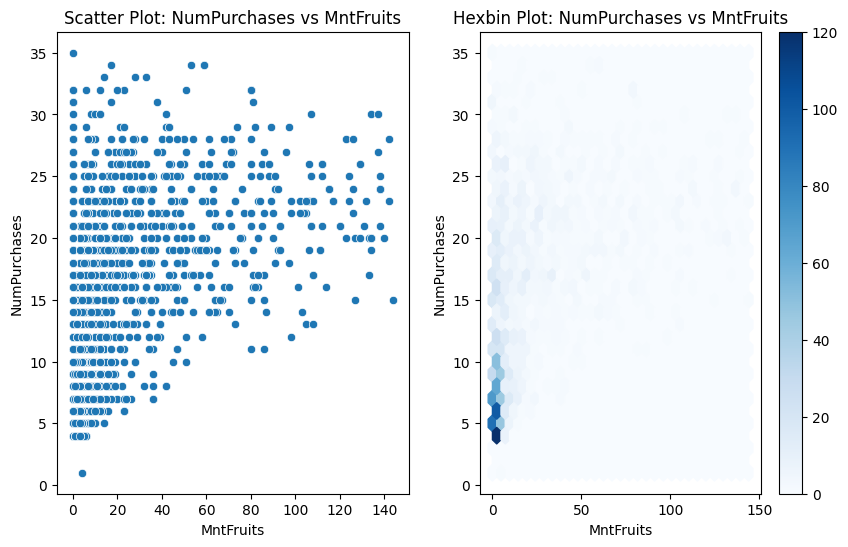

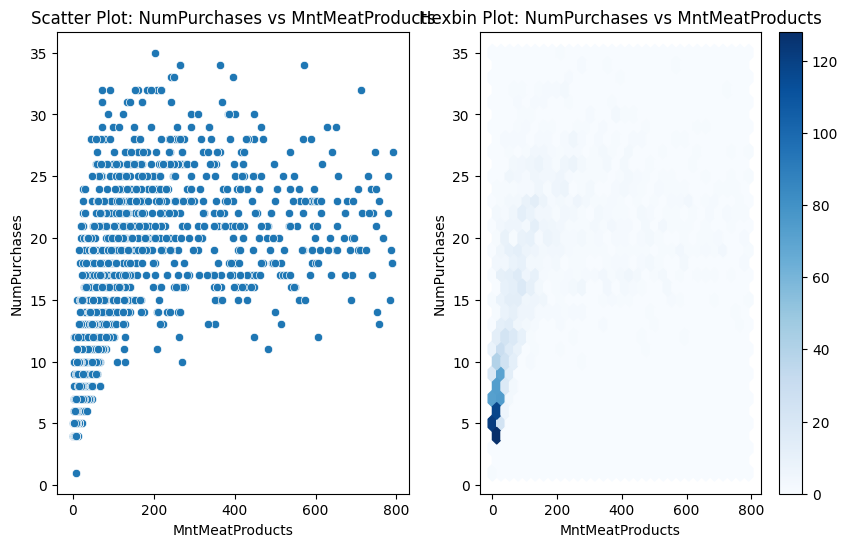

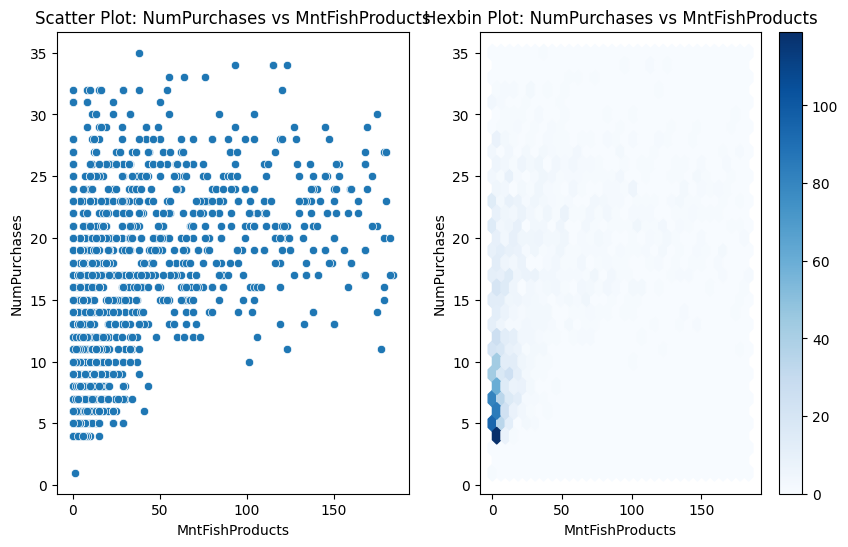

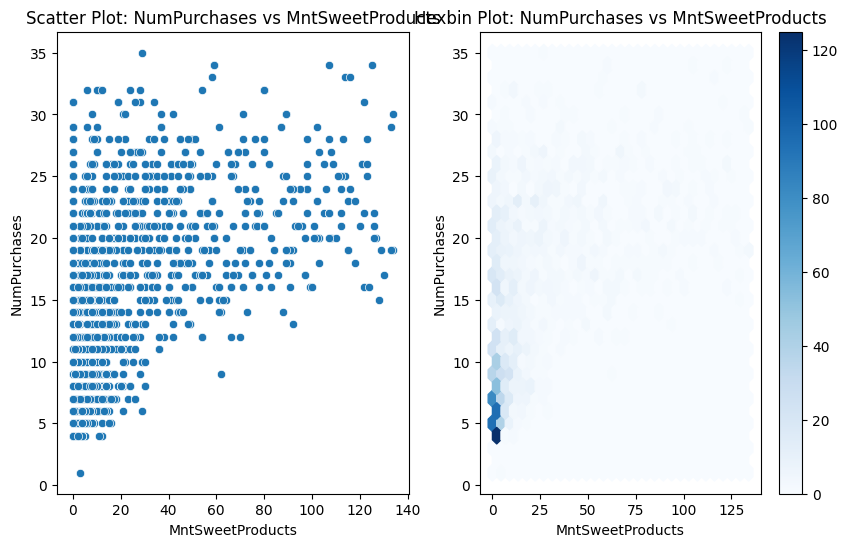

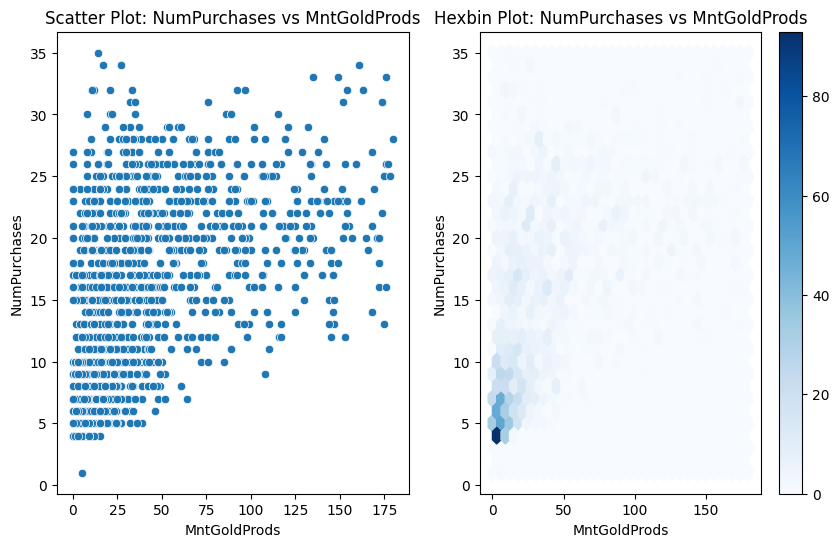

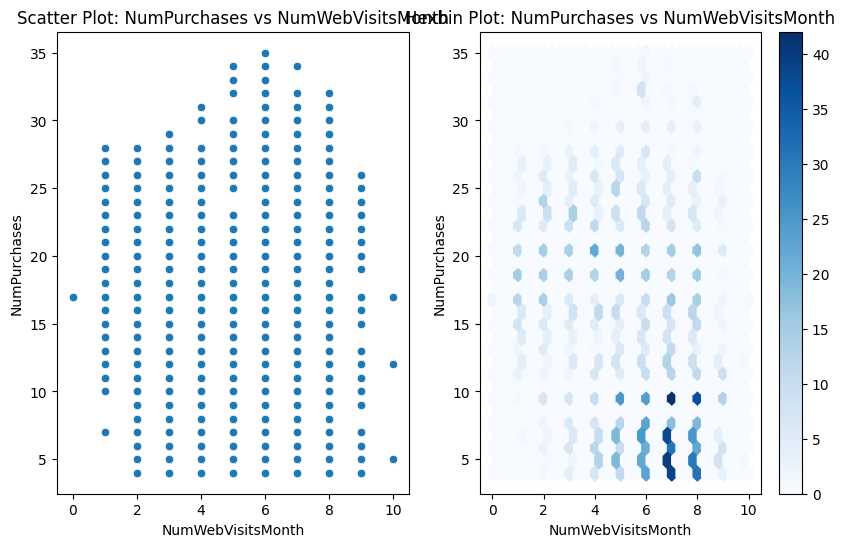

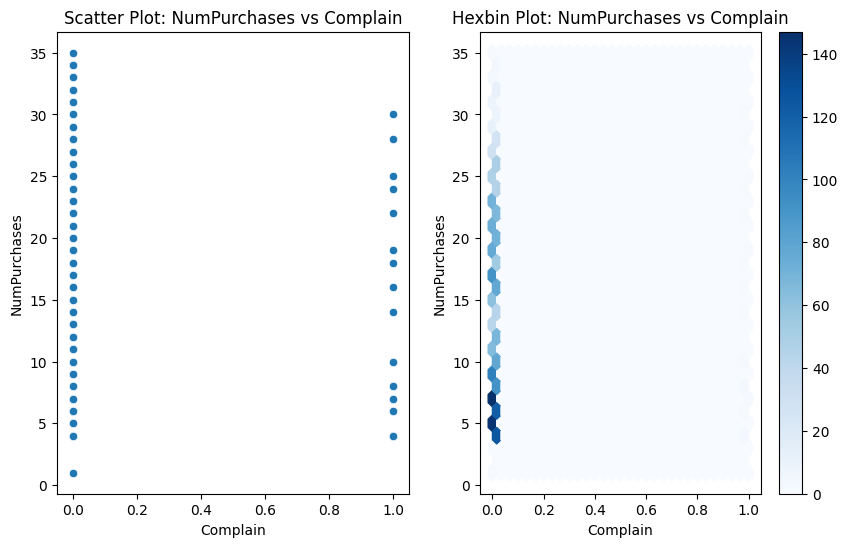

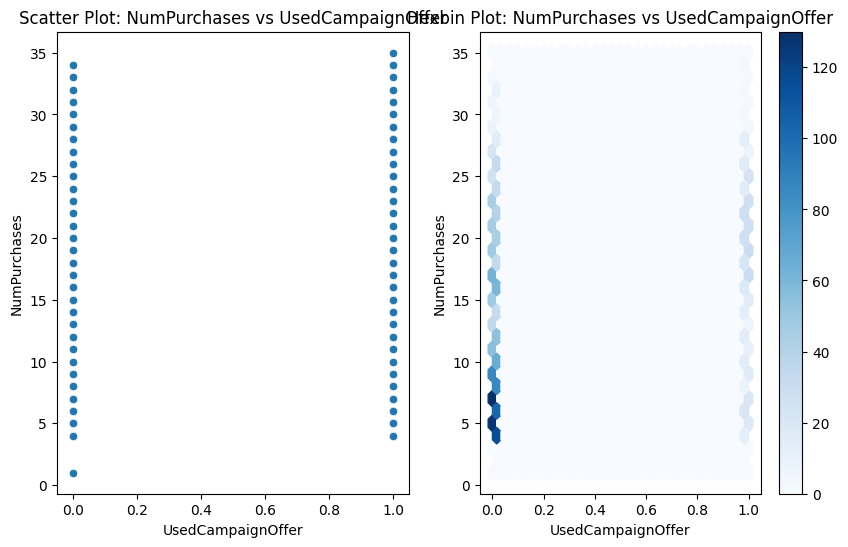

In [71]:
plot_feature_relationship(df , 'NumPurchases' , 'Income')
plot_feature_relationship(df_cleaned , 'NumPurchases' , 'Income')
plot_feature_relationship(df_cleaned , 'NumPurchases' , 'Kidhome')
plot_feature_relationship(df_cleaned , 'NumPurchases' , 'Teenhome')
plot_feature_relationship(df_cleaned , 'NumPurchases' , 'Recency')
plot_feature_relationship(df_cleaned , 'NumPurchases' , 'Recency')
plot_feature_relationship(df_cleaned , 'NumPurchases' , 'MntCoffee')
plot_feature_relationship(df_cleaned , 'NumPurchases' , 'MntFruits')
plot_feature_relationship(df_cleaned , 'NumPurchases' , 'MntMeatProducts')
plot_feature_relationship(df_cleaned , 'NumPurchases' , 'MntFishProducts')
plot_feature_relationship(df_cleaned , 'NumPurchases' , 'MntSweetProducts')
plot_feature_relationship(df_cleaned , 'NumPurchases' , 'MntGoldProds')
plot_feature_relationship(df_cleaned , 'NumPurchases' , 'NumWebVisitsMonth')
plot_feature_relationship(df_cleaned , 'NumPurchases' , 'Complain')
plot_feature_relationship(df_cleaned , 'NumPurchases' , 'UsedCampaignOffer')

## DATA PREPRATION PART :

### MISSING VALUES :

,Missing Values,Percentage of Total
I,0,0.000000
ID,0,0.000000
Year_Birth,0,0.000000
Education,0,0.000000
Marital_Status,0,0.000000
Income,0,0.000000
Kidhome,0,0.000000
Teenhome,0,0.000000
Dt_Customer,0,0.000000
Recency,0,0.000000


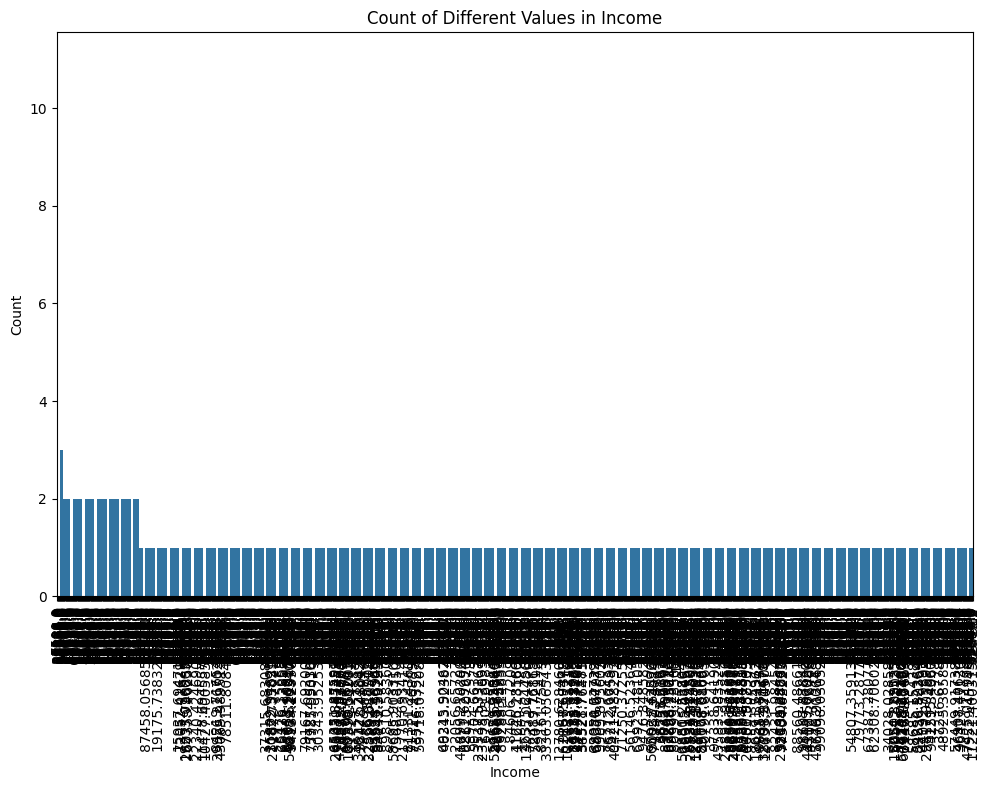

In [72]:
def fill_missing_with_uniform(df, column_name):
    min_value = df[column_name].min()
    max_value = df[column_name].max()
    
    num_missing = df[column_name].isnull().sum()
    
    random_values = np.random.uniform(min_value, max_value, num_missing)
    
    df.loc[df[column_name].isnull(), column_name] = random_values
    
    return df

filled_df = fill_missing_with_uniform(df_cleaned, 'Income')

missing_count = filled_df.isnull().sum()

missing_percentage = (filled_df.isnull().sum() * 100) / len(filled_df)

filled_missing_values_df = pd.DataFrame({
    'Missing Values': missing_count,
    'Percentage of Total': missing_percentage
})

display(filled_missing_values_df)
plot_feature_value_counts(filled_df , 'Income')


,Missing Values,Percentage of Total
I,0,0.000000
ID,0,0.000000
Year_Birth,0,0.000000
Education,0,0.000000
Marital_Status,0,0.000000
Income,0,0.000000
Kidhome,0,0.000000
Teenhome,0,0.000000
Dt_Customer,0,0.000000
Recency,0,0.000000


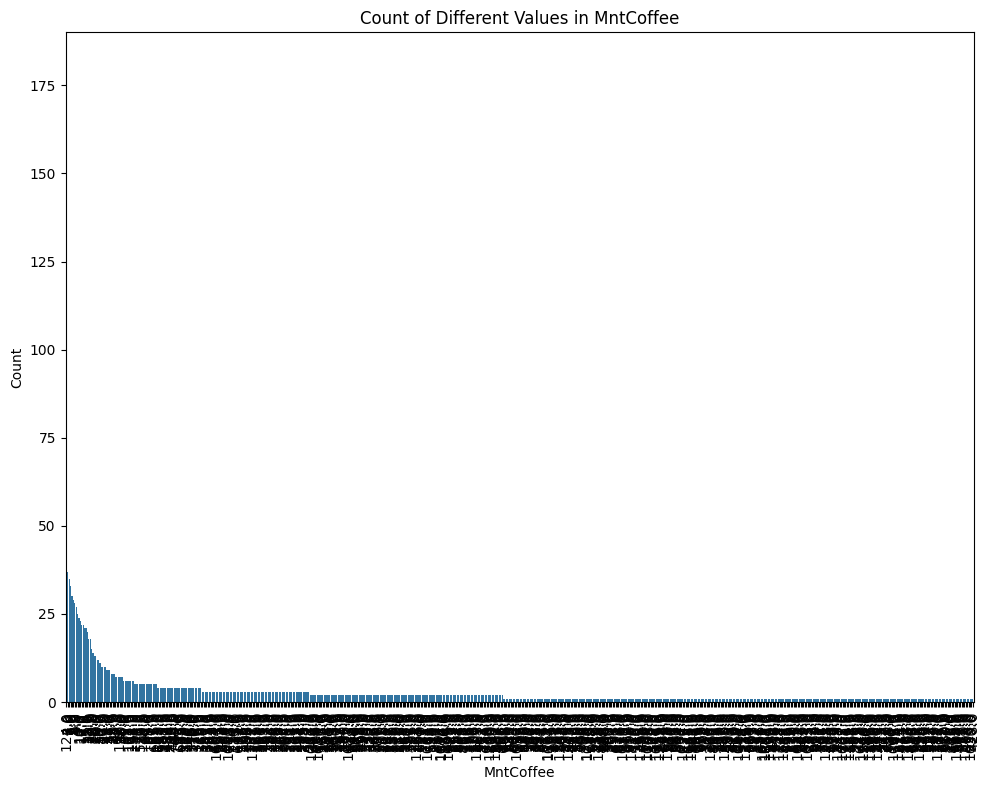

In [73]:
median_value = filled_df['MntCoffee'].median()

# Fill missing values with the median
filled_df['MntCoffee'].fillna(median_value, inplace=True)

missing_count = filled_df.isnull().sum()

missing_percentage = (filled_df.isnull().sum() * 100) / len(filled_df)

filled_missing_values_df = pd.DataFrame({
    'Missing Values': missing_count,
    'Percentage of Total': missing_percentage
})
display(filled_missing_values_df)
plot_feature_value_counts(filled_df , 'MntCoffee')

,Missing Values,Percentage of Total
I,0,0.000000
ID,0,0.000000
Year_Birth,0,0.000000
Education,0,0.000000
Marital_Status,0,0.000000
Income,0,0.000000
Kidhome,0,0.000000
Teenhome,0,0.000000
Dt_Customer,0,0.000000
Recency,0,0.000000


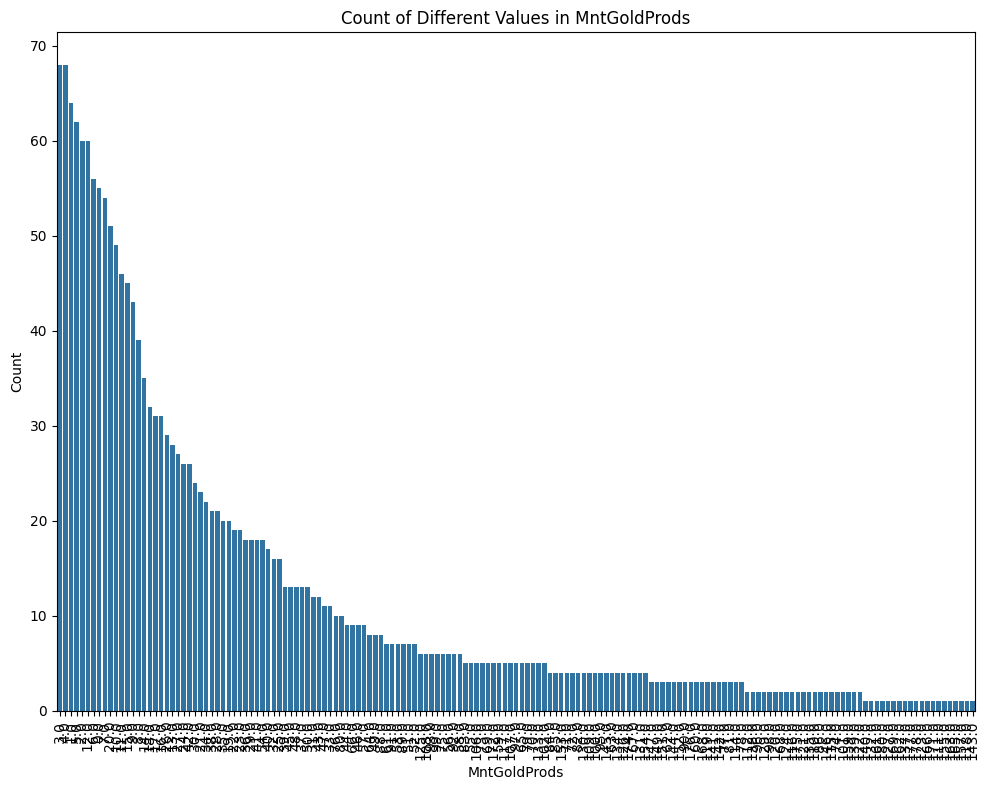

In [74]:
median_value = filled_df['MntGoldProds'].median()

# Fill missing values with the median
filled_df['MntGoldProds'].fillna(median_value, inplace=True)

missing_count = filled_df.isnull().sum()

missing_percentage = (filled_df.isnull().sum() * 100) / len(filled_df)

filled_missing_values_df = pd.DataFrame({
    'Missing Values': missing_count,
    'Percentage of Total': missing_percentage
})
display(filled_missing_values_df)
plot_feature_value_counts(filled_df , 'MntGoldProds')

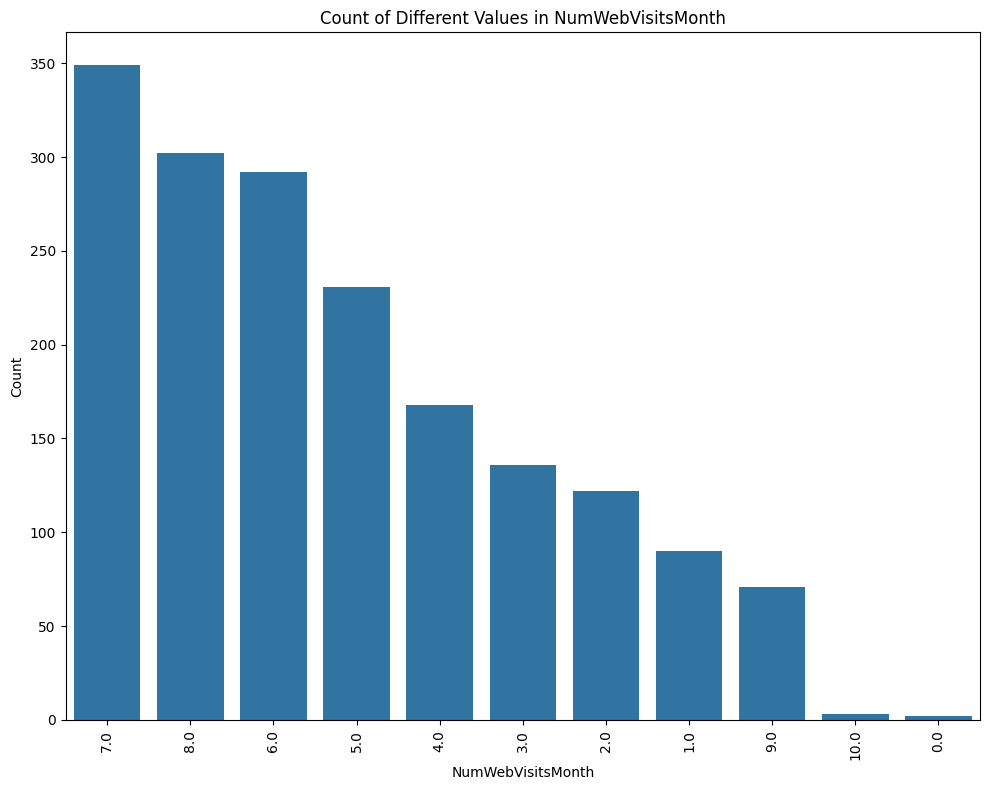

In [75]:
plot_feature_value_counts(filled_df , 'NumWebVisitsMonth')

,Missing Values,Percentage of Total
I,0,0.0
ID,0,0.0
Year_Birth,0,0.0
Education,0,0.0
Marital_Status,0,0.0
Income,0,0.0
Kidhome,0,0.0
Teenhome,0,0.0
Dt_Customer,0,0.0
Recency,0,0.0


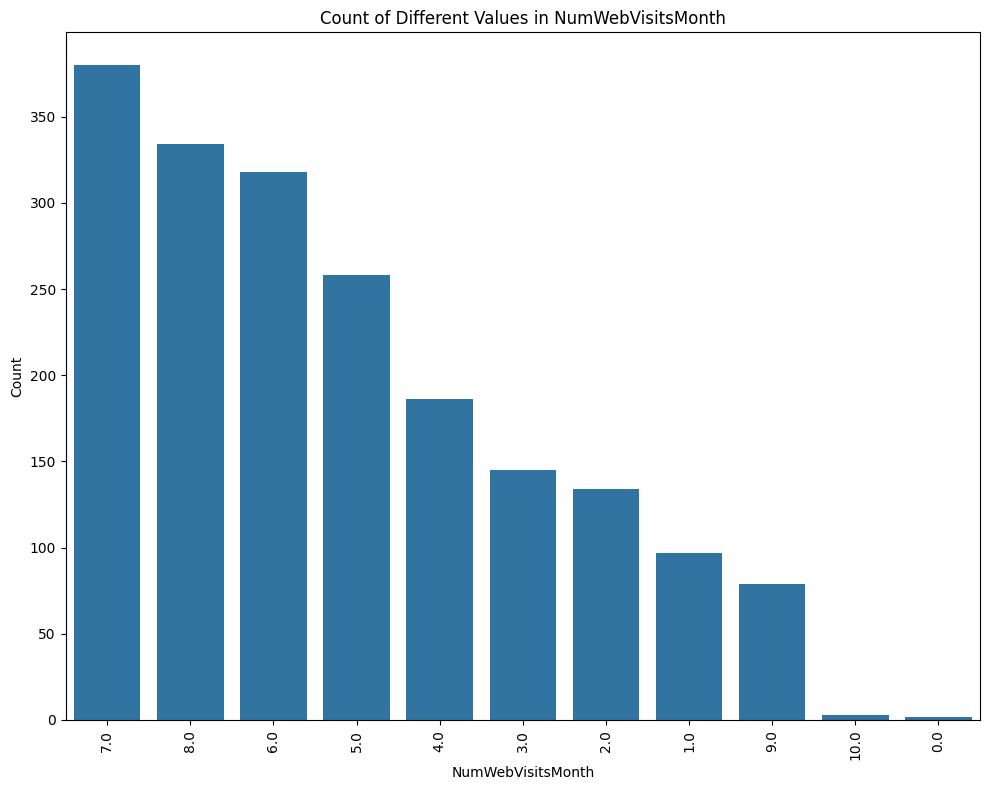

In [76]:
def fill_missing_with_distribution(df, column_name):
    # Get the frequency distribution of the non-missing values
    value_counts = df[column_name].dropna().value_counts(normalize=True)
    
    # Create a list of potential values to fill in, based on existing data distribution
    # 'p' argument contains the probabilities for each value
    fill_values = np.random.choice(value_counts.index, size=df[column_name].isnull().sum(), p=value_counts.values)
    
    # Fill the missing values with the randomly selected fill_values
    df.loc[df[column_name].isnull(), column_name] = fill_values
    
    return df

filled_df = fill_missing_with_distribution(filled_df, 'NumWebVisitsMonth')

missing_count = filled_df.isnull().sum()

missing_percentage = (filled_df.isnull().sum() * 100) / len(df)

filled_missing_values_df = pd.DataFrame({
    'Missing Values': missing_count,
    'Percentage of Total': missing_percentage
})
display(filled_missing_values_df)
plot_feature_value_counts(filled_df , 'NumWebVisitsMonth')

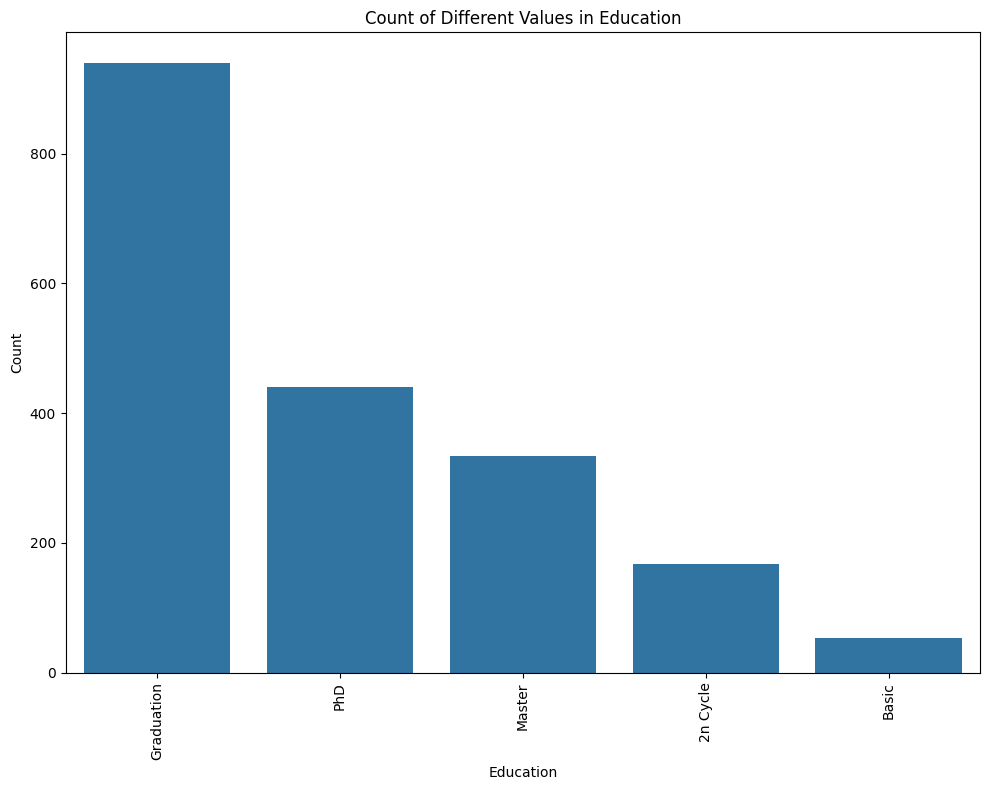

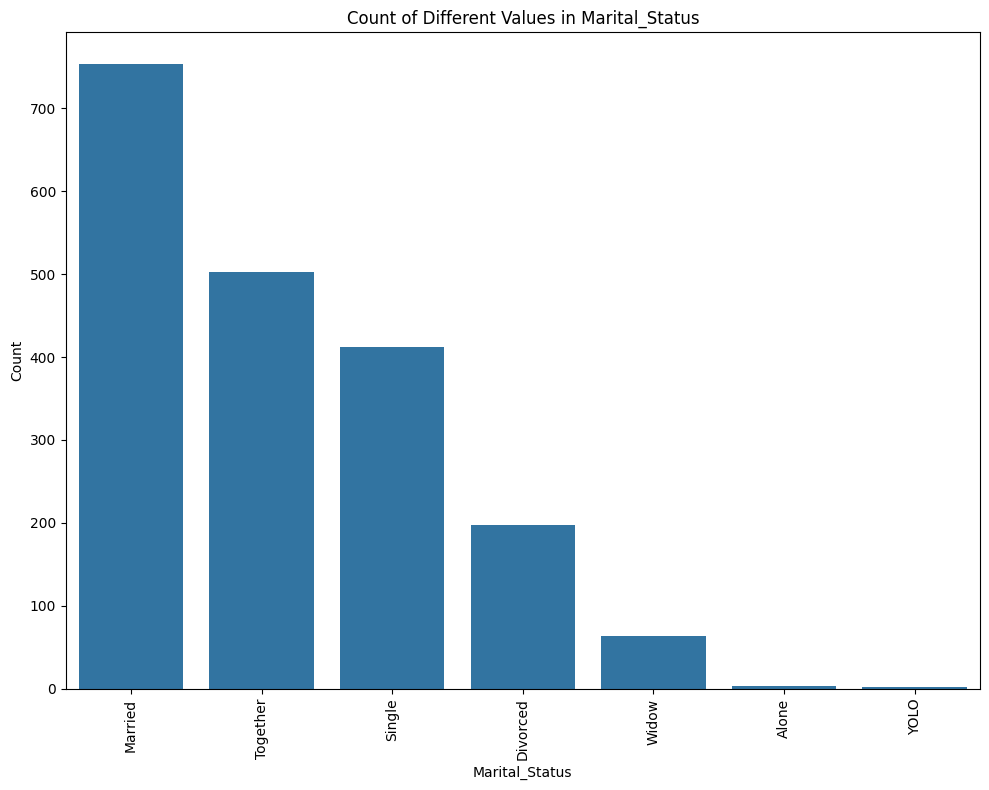

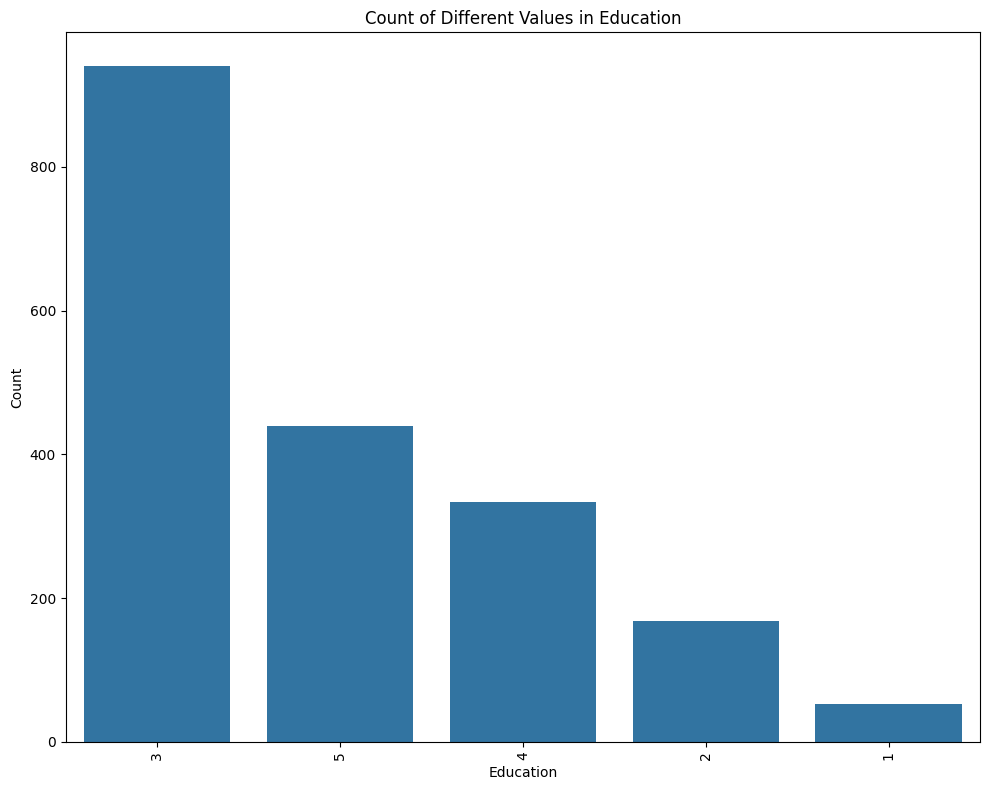

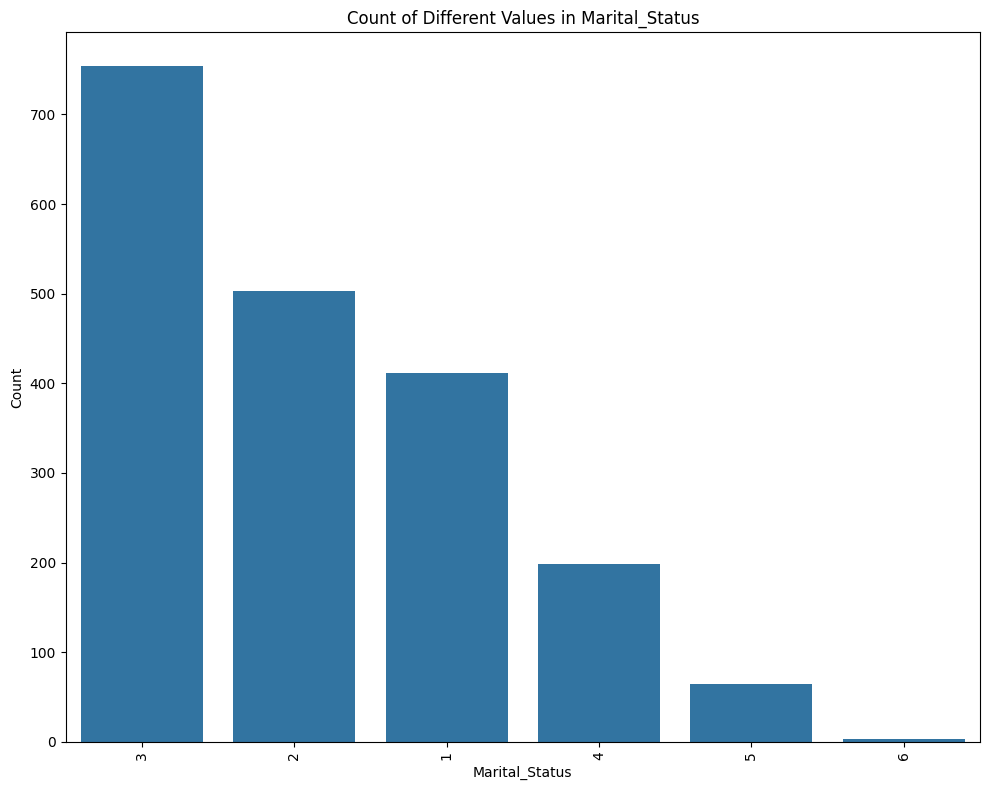

In [77]:
plot_feature_value_counts(filled_df , 'Education')
plot_feature_value_counts(filled_df , 'Marital_Status')
filled_df = filled_df[filled_df['Marital_Status'] != 'YOLO']
education_mapping = {'PhD' : 5, 'Master' : 4, 'Graduation' : 3, '2n Cycle' : 2, 'Basic' : 1}
marital_status_mapping = {'Single' : 1, 'Together' : 2, 'Married' : 3, 'Divorced' : 4, 'Widow' : 5, 'Alone' : 6}

filled_df.loc[:, 'Education'] = filled_df['Education'].replace(education_mapping)
filled_df.loc[:, 'Marital_Status'] = filled_df['Marital_Status'].replace(marital_status_mapping)
plot_feature_value_counts(filled_df , 'Education')
plot_feature_value_counts(filled_df , 'Marital_Status')

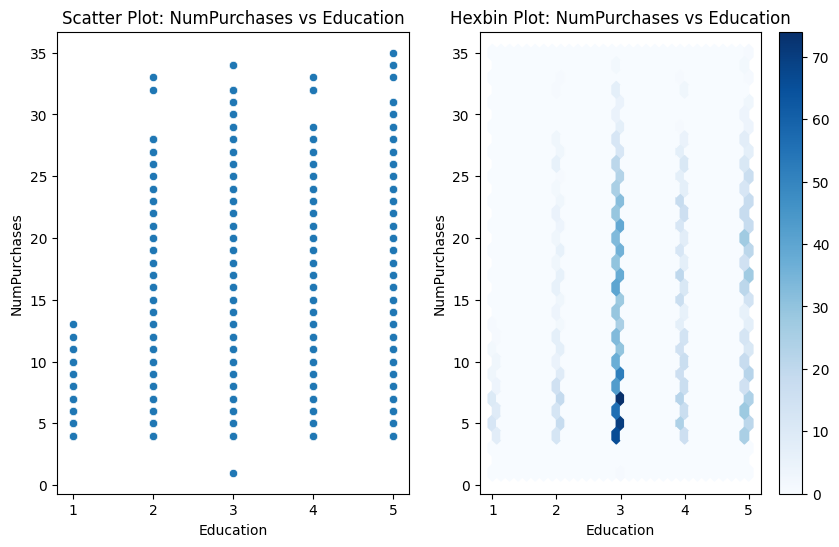

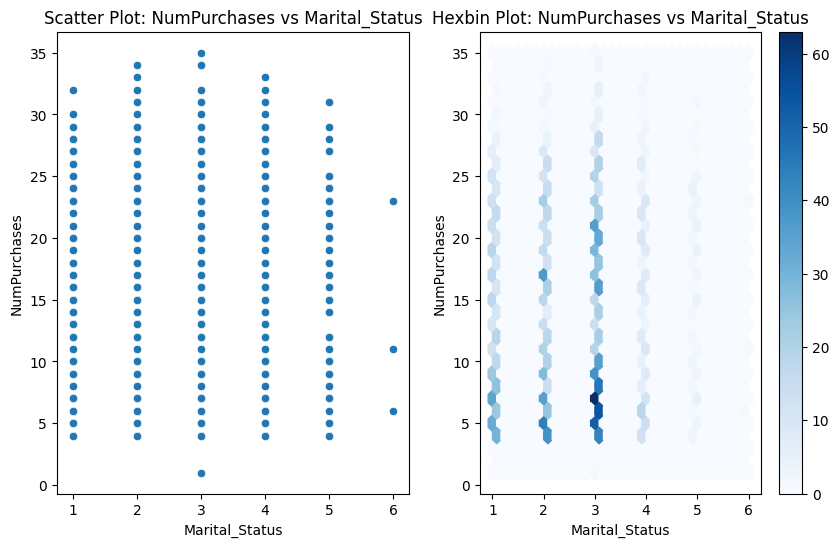

In [78]:
plot_feature_relationship(filled_df , 'NumPurchases' , 'Education')
plot_feature_relationship(filled_df , 'NumPurchases' , 'Marital_Status')


In [79]:
import datetime
import copy

In [80]:
def DateToDay(input_date):
    date = datetime.datetime.strptime(input_date, '%d/%m/%Y')
    days = (datetime.date(date.year, date.month,date.day) - datetime.date(1, 1, 1)).days
    return days

In [81]:
from sklearn.preprocessing import StandardScaler

def standardize_numerical_fields(df, exceptions=None):
    df_standardized = df.copy()
    
    if exceptions is None:
        exceptions = []
    
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    columns_to_scale = [col for col in numerical_columns if col not in exceptions]
    
    scaler = StandardScaler()
    
    df_standardized[columns_to_scale] = scaler.fit_transform(df_standardized[columns_to_scale])

    return df_standardized

In [82]:
standardized_df = standardize_numerical_fields(filled_df , ['UsedCampaignOffer' , 'Complain' , 'Year_Birth' , 'ID' , 'I'])
display(standardized_df)

,I,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoffee,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Complain,NumPurchases,UsedCampaignOffer
0,0,5524,1957,3,1,0.455327,-0.859661,-0.990495,4/9/2012,0.308796,1.252563,2.421702,2.525553,3.717682,2.516074,1.378383,-1.192594,0,1.460005,1
1,1,2174,1954,3,1,-0.128494,0.874004,0.844387,8/3/2014,-0.382941,-0.419661,-0.616811,-0.694354,-0.625801,-0.635701,-0.736098,-0.269265,0,-1.058862,0
2,2,4141,1965,3,2,1.122361,-0.859661,-0.990495,21-08-2013,-0.797984,-0.419661,1.059610,0.027144,2.159138,0.088845,0.192211,1.115729,0,0.929717,0
3,3,6182,1984,3,2,-1.103575,0.874004,-0.990495,10/2/2014,-0.797984,-0.789448,-0.512035,-0.610875,-0.421402,-0.563246,-0.761884,0.192400,0,-0.793718,0
4,4,5324,1981,5,3,0.463000,0.874004,-0.990495,19-01-2014,1.553923,-0.259311,0.850057,-0.026521,0.498395,0.306209,-0.504020,-0.269265,0,0.664573,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,2234,8372,1974,3,3,1.323792,0.874004,-0.990495,1/7/2013,1.104294,-0.815628,-0.546961,-0.688391,-0.523601,-0.599474,-0.658739,0.654065,0,-1.324006,0
2236,2236,4001,1946,5,2,0.746198,2.607668,0.844387,10/6/2014,0.239622,0.503171,-0.651737,-0.551247,-0.676900,-0.671928,-0.684525,0.654065,0,1.062289,1
2237,2237,7270,1981,3,4,0.398054,-0.859661,-0.990495,25-01-2014,1.450163,2.145943,1.024684,0.563795,0.140696,-0.237201,-0.271943,0.192400,0,0.664573,1
2238,2238,8235,1956,4,2,1.005141,-0.859661,0.844387,24-01-2014,-1.420547,0.575165,0.396026,0.545907,1.367091,0.414891,0.682152,1.115729,0,1.194861,0


In [83]:
from sklearn.model_selection import train_test_split

train_size = 0.8
random_state = 3

train_df, test_df = train_test_split(standardized_df, train_size=train_size, random_state=random_state)
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1547 entries, 1935 to 2198
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   I                  1547 non-null   int64  
 1   ID                 1547 non-null   int64  
 2   Year_Birth         1547 non-null   int64  
 3   Education          1547 non-null   object 
 4   Marital_Status     1547 non-null   object 
 5   Income             1547 non-null   float64
 6   Kidhome            1547 non-null   float64
 7   Teenhome           1547 non-null   float64
 8   Dt_Customer        1547 non-null   object 
 9   Recency            1547 non-null   float64
 10  MntCoffee          1547 non-null   float64
 11  MntFruits          1547 non-null   float64
 12  MntMeatProducts    1547 non-null   float64
 13  MntFishProducts    1547 non-null   float64
 14  MntSweetProducts   1547 non-null   float64
 15  MntGoldProds       1547 non-null   float64
 16  NumWebVisitsMonth  1547 no

## Data_prepration_questions :

### Q7 :<br>
There are different ways to deal with missing data, from the simplest way, such as deleting the data, to simple imputation methods, such as replacing them with the mean or average, or even when we want high quality data, it can be done by implementing other algorithms. For the same field, first replace the missing values of those fields using those algorithms and then start implementing the desired algorithm.<br>
Naturally, the more advanced our imputation method is, we expect higher accuracy from it

### Q8:<br>
It is done in the code above.

### Q9:<br>
The data in the problem are generally measured with different scales, which causes the data to find different intervals, some very large intervals and some small intervals, and this problem prevents the participation of all features in our algorithm. The reason is scaled to 0 centrality and 1 standard deviation with the help of data standardization methods.<br>
Normalization is just scaling

### Q10:<br>
If the data is irrelevant and not very important, we can delete that column. If it is important data, there are different ways to deal with it, such as converting every possible value into a number and coding them with the help of numbers.
You can also use methods to hash the data.

### Q11:<br>
Yes, the columns and features that have no meaningful relationship with our target data can be removed from the data.

### Q12:<br>
Different methods for dividing the data into these two parts can be adopted depending on the problem, for example, we can use a certain percentage of the data from the beginning as the training data or we can randomly select a percentage of the data. Consider to be able to reproduce.
It is also possible to choose in such a way that there are a number of closenesses from each possible class in the training data.
80% to 20% can be considered as a suitable percentage for training and testing data

### Q13:<br>
From the validation data, it is used to validate and evaluate the hyperparameters of the model, and in fact, at each stage, you can check with the data of this category whether our model has really improved or not. Because the data of this category are different from the data of the test category, they can actually help our model to check its performance in each iteration so that it can improve at each stage. For example, we can divide the data in the ratio of 70 to 15 to 15 for train, test and validation.

### Q14:<br>
In this algorithm, first they divide the data into k different groups, then in k steps and each time removing one of these parts from the training data, they train the model and improve its MSE, and finally, an average is taken from the model. they use

# Linear Regression

Main form of simple linear regression function:
$$f(x) = \alpha x + \beta$$

here we want to find the bias ($\alpha$) and slope($\beta$) by minimizing the derivation of the Residual Sum of Squares (RSS) function:

- step 1: Compute RSS of the training data  

$$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$

- step 2: Compute the derivatives of the RSS function in terms of $\alpha$ and $\beta$, and set them equal to 0 to find the desired parameters

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} * x_i) = 0$$
$$ \to \beta = \hat{y} - \hat{\alpha} \hat{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$

$$ (1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$
$$ \hat{\beta} = \hat{y} - \hat{a} \hat{x}$$



Based on the above formula, implement the function below to compute the parameters of a simple linear regression

In [84]:
def simple_linear_regression(input_feature, output):
    mean_x = np.mean(input_feature) 
    mean_y = np.mean(output)
    sig = 0
    dis = 0
    for i in range(len(input_feature)):
        sig += (input_feature[i] - mean_x) * (output[i] - mean_y)
        dis += (input_feature[i] - mean_x)**2
    alpha = sig / dis
    beta = mean_y - alpha*mean_y
    
    return alpha, beta

Now complete this `get_regression_predictions(...)` function to predict the value of given data based on the calculated intercept and slope

In [85]:
def get_regression_predictions(input_feature, bias, slope):
    return (input_feature * slope + bias)

Now that we have a model and can make predictions, let's evaluate our model using Root Mean Square Error (RMSE). RMSE is the square root of the mean of the squared differences between the residuals, and the residuals is just a fancy word for the difference between the predicted output and the true output.

Complete the following function to compute the RSME of a simple linear regression model given the input_feature, output, intercept and slope:

In [86]:
def get_root_mean_square_error(predicted_values, outputs):
    Mse = 0
    for y_predicted , y in zip(predicted_values, outputs):
        error = y - y_predicted
        Mse += error**2
    Mse = Mse/len(predicted_values)
    Rmse = np.sqrt(Mse)
    return Rmse

The RMSE has no bound, thus it becomes challenging to determine whether a particular RMSE value is considered good or bad without any reference point. Instead, we use R2 score. The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. The R2 score is formulated as below:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

Complete the following function to calculate the R2 score of a given input_feature, output, bias, and slope:

In [87]:
def get_r2_score(predicted_values, outputs):
    SSres = 0
    SStot = 0
    for i in range(len(outputs)):
        SSres += (outputs[i] - predicted_values[i])**2
    for i in range(len(outputs)):
        SStot += (outputs[i] - np.mean(outputs))**2
    return 1 - (SSres /SStot)

Now calculate the fitness of the model.
Remember to provide explanation for the outputs in your code!

In [88]:
def get_feature_list(df, feature_names):
    return [df[feature].to_list() for feature in feature_names]

def get_alpha_beta_list(feature_list, output_list):
    return [simple_linear_regression(feature, output_list) for feature in feature_list]

def get_predictions(test_feature_list, alpha_beta_list):
    predictions = []
    for i in range(len(test_feature_list)):
        out = [get_regression_predictions(test_feature_list[i][j], alpha_beta_list[i][1], alpha_beta_list[i][0]) for j in range(len(test_feature_list[i]))]
        predictions.append(out)
    return predictions

def get_score_dict(predict_out_list, test_output_list, feature_names):
    score_dict = {}
    for i in range(len(predict_out_list)):
        rmse = get_root_mean_square_error(predict_out_list[i], test_output_list)
        r2 = get_r2_score(predict_out_list[i], test_output_list)
        score_dict[feature_names[i]] = {'R2' : r2 , 'RMSE' : rmse}
    return score_dict

feature_names = ['MntCoffee','Income','MntGoldProds','MntMeatProducts']
designated_feature_list = get_feature_list(train_df, feature_names)
output_list = train_df['NumPurchases'].to_list()
alpha_beta_list = get_alpha_beta_list(designated_feature_list, output_list)
test_feature_list = get_feature_list(test_df, feature_names)
predict_out_list = get_predictions(test_feature_list, alpha_beta_list)
score_dict = get_score_dict(predict_out_list, test_df['NumPurchases'].to_list(), feature_names)
score_data_frame = pd.DataFrame(score_dict)
display(score_data_frame)


,MntCoffee,Income,MntGoldProds,MntMeatProducts
R2,0.512648,0.397554,0.320483,0.390404
RMSE,0.677422,0.753177,0.799904,0.757632


### Q16:<br>
According to the correlation we got between the data, MntCoffee data should give a better result due to its higher correlation coefficient with our target field in the data and for this reason we chose this field and the result confirmed our hypothesis.

# Multiple Regression

Multiple regression is a statistical technique that aims to model the relationship between a dependent variable and two or more independent variables.

Multiple regression with n independent variables is expressed as follows:

$$f(x) = \beta _{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + \beta_{3} x_{3} + \beta_{4} x_{4} + ... + \beta_{n} x_{n} + c $$

To optimize the model for accurate predictions, multiple regression commonly employs iterative algorithms such as gradient descent.

The main goal of the optimization process is to make our predictions as close as possible to the actual values.
We measure the prediction error using a cost function, usually denoted as $J(\beta)$.

$$ J(\beta)= \frac {1}{2m} Σ_{i=0}^{m-1}(y_i - (\hat \beta _{0} + \hat \beta_{1} x_{1} + \hat \beta_{2} x_{2} + \hat \beta_{3} x_{3} + \hat \beta_{4} x_{4} + ... + \hat \beta_{n} x_{n}) )^2  $$

Gradient descent iteratively adjusts the coefficients $(\beta_i)$ to minimize the cost function. The update rule for each coefficient is:

$$\beta_{i} = \beta _ {i} - \alpha \frac {∂J(\beta)}{∂\beta_{i}}$$

$$ \frac {∂J(\beta)}{∂\beta_{i}} = \frac {1}{m}Σ_{j=0}^{m-1}(y_j - (\hat \beta _{0} + \hat \beta_{1} x_{j1} + \hat \beta_{2} x_{j2} + \hat \beta_{3} x_{j3} + \hat \beta_{4} x_{j4} + ... + \hat \beta_{n} x_{jn})) x_{ji} $$



## Predicting output given regression weights

Based on the formula above and [np.dot()](https://numpy.org/doc/stable/reference/generated/numpy.dot.html) method, complete this function to compute the predictions for an entire matrix of features given the matrix, bias, and the weights. Provide an explanation of np.dot method and the reasoning behind using this method in your code:

In [89]:
def predict_output(feature_matrix, weights, bias):
    predicts = np.dot(feature_matrix, weights) + bias
    return predicts

## Computing the Derivative

As we saw, the cost function is the sum over the data points of the squared difference between an observed output and a predicted output.

Since the derivative of a sum is the sum of the derivatives, we can compute the derivative for a single data point and then sum over data points. We can write the squared difference between the observed output and predicted output for a single point as follows:

$$
(output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))^2
$$

With n feautures and a const , So the derivative will be :


$$
2 * (output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))
$$

The term inside the paranethesis is just the error (difference between prediction and output). So we can re-write this as:

$$2 * error*[feature_i] $$


That is, the derivative for the weight for feature i is the sum (over data points) of 2 times the product of the error and the feature itself. In the case of the constant then this is just twice the sum of the errors!

Recall that twice the sum of the product of two vectors is just twice the dot product of the two vectors. Therefore the derivative for the weight for feature_i is just two times the dot product between the values of feature_i and the current errors.


With this in mind, complete the following derivative function which computes the derivative of the weight given the value of the feature (over all data points) and the errors (over all data points).


In [90]:
def feature_derivative(errors, feature):
    derivative = 2 * np.dot(errors, feature)
    return derivative 

## Gradient Descent

Now we will write a function that performs a gradient descent. The basic premise is simple. Given a starting point we update the current weights by moving in the negative gradient direction. Recall that the gradient is the direction of increase and therefore the negative gradient is the direction of decrease and we're trying to minimize a cost function.


The amount by which we move in the negative gradient direction is called the 'step size'. We stop when we are 'sufficiently close' to the optimum. We define this by requiring that the magnitude (length) of the gradient vector to be smaller than a fixed 'tolerance'.


With this in mind, complete the following gradient descent function below using your derivative function above. For each step in the gradient descent we update the weight for each feature befofe computing our stopping criteria.

In [91]:
def regression_gradient_descent(feature_matrix, outputs, initial_weights, bias, step_size, tolerance):
    is_converged = False
    weights = np.array(initial_weights)
    new_bias = bias
    
    while not is_converged:

        predictions = predict_output(feature_matrix, weights, new_bias)
        errors = predictions - outputs
        
        
        new_bias -= step_size * 2 * np.sum(errors)
        
        for i in range(len(weights)):
            derivative = feature_derivative(errors, feature_matrix[:,i])
            weights[i] -= step_size * derivative
            
        gradientMagnitude = np.linalg.norm(feature_derivative(errors, feature_matrix))
        biasGradient = np.linalg.norm(2 * np.sum(errors))
        
        if gradientMagnitude < tolerance and biasGradient < tolerance:
            is_converged = True
    
    
    return weights, new_bias

In [92]:
def normalize_features(chosen_features, data_frame):
    for feature in chosen_features:
        data_frame[feature] = (data_frame[feature] - data_frame[feature].mean()) / data_frame[feature].std()
    return data_frame


def n_feature_regression(chosen_feature_matrix, target_matrix, keywords):
    initial_weights = keywords['initial_weights']
    step_size = keywords['step_size']
    tolerance = keywords['tolerance']
    bias = keywords['bias']

    weights, bias = regression_gradient_descent(chosen_feature_matrix, target_matrix, initial_weights, bias, step_size,
                                                tolerance)

    return weights, bias

def get_weights_and_bias(chosen_features):
    """
    Computes the weights and bias for a general n feature model.
    :param chosen_features:  list of features to perform multiple regression on
    :return: chosen_feature_matrix, computed weights and bias via regression
    """

    # ToDo
    #  Would selecting different initial weights make any difference?
    #  Explain your answer.
    keywords = {
        'initial_weights': np.array([.5]*len(chosen_features)),
        'step_size': 1.e-4,
        'tolerance': 1.e-10,
        'bias': 0
    }
   

    chosen_feature_dataframe = copy.deepcopy(train_df[chosen_features])
    # ToDo
    #  Why are the features normalized?
    chosen_feature_dataframe = normalize_features(chosen_features,chosen_feature_dataframe)
    chosen_feature_matrix = chosen_feature_dataframe.to_numpy()

    target_column = copy.deepcopy(train_df['NumPurchases'])
    target_matrix = target_column.to_numpy()

    train_weights, bias = n_feature_regression(chosen_feature_matrix, target_matrix, keywords)

    return chosen_feature_matrix, train_weights, bias

## Two Feature Regression

In this part, you should choose 2 features and implement multiple regression on them :

In [93]:
chosen_features = ['Income', 'MntCoffee']
feature_matrix,weights,bias = get_weights_and_bias(chosen_features) 
# ToDo
# compute the chosen_feature_matrix, train_weights, and bias

In [94]:
#ToDo
# compute the predictions
test_features = copy.deepcopy(test_df[chosen_features])
test_featuresn = normalize_features(chosen_features,test_features).to_numpy() 
test_out = copy.deepcopy(test_df['NumPurchases']).to_numpy() 
predict = predict_output(test_featuresn,weights,bias)

In [95]:
#ToDo
# Calculate the R2 score and mean square error
# Explain the results
print("R2 score : ",get_r2_score(predict,test_out))
print("RMSE : ",get_root_mean_square_error(predict,test_out))

R2 score :  0.586108518126671
RMSE :  0.6242821497284256


## Three Feature Regression

Now repeat the steps for 3 features

In [96]:
display(test_df)

,I,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoffee,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Complain,NumPurchases,UsedCampaignOffer
228,228,460,1972,5,3,1.534065,-0.859661,-0.990495,8/8/2012,0.793012,1.766339,2.351851,3.682335,1.034943,1.175664,-0.452448,-1.654258,0,0.399430,0
177,177,10854,1970,5,3,-1.214713,0.874004,0.844387,23-05-2014,1.415576,-0.730544,-0.651737,-0.646651,-0.676900,-0.671928,-0.839243,0.654065,0,-0.926290,0
1801,1801,6977,1974,3,2,1.324772,-0.859661,0.844387,14-10-2012,1.311815,2.685898,-0.651737,3.020465,3.027834,0.668482,0.063279,0.654065,0,1.990293,1
1994,1994,4547,1960,3,2,-1.745807,0.874004,0.844387,17-04-2013,1.277228,-0.805811,-0.581886,-0.676465,-0.625801,-0.635701,-0.761884,1.115729,0,-1.058862,0
669,669,7426,1971,2,3,0.284646,0.874004,0.844387,7/11/2013,0.931360,-0.462203,-0.092930,-0.509507,-0.498051,-0.345883,-0.426661,-1.192594,0,-0.263430,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520,1520,4278,1983,5,1,1.893347,-0.859661,-0.990495,3/6/2013,0.827599,2.152488,3.224987,3.586930,0.575044,2.008892,0.527434,-1.192594,0,0.664573,1
1523,1523,10795,1973,5,3,-0.571186,0.874004,-0.990495,6/5/2014,-1.213026,-0.763269,-0.546961,-0.616837,-0.600251,-0.635701,-0.813457,0.654065,0,-0.926290,0
39,39,2968,1943,5,4,0.000408,-0.859661,-0.990495,1/2/2013,0.135862,0.604617,-0.372333,0.498204,3.411083,1.103209,0.192211,0.192400,0,1.327433,1
973,973,6357,1959,2,4,0.500572,-0.859661,0.844387,17-11-2013,-0.694223,-0.072781,0.570654,-0.282921,0.932743,1.393028,-0.091439,-0.269265,0,0.532001,0


In [97]:
# ToDo
chosen_features = ['Income', 'MntCoffee', 'MntMeatProducts']
feature_matrix,weights,bias = get_weights_and_bias(chosen_features)
test_features = copy.deepcopy(test_df[chosen_features])
test_featuresn = normalize_features(chosen_features,test_features).to_numpy() 
test_out = copy.deepcopy(test_df['NumPurchases']).to_numpy() 
predict = predict_output(test_featuresn,weights,bias)
print("R2 score : ",get_r2_score(predict,test_out))
print("RMSE : ",get_root_mean_square_error(predict,test_out))

R2 score :  0.6100736597409455
RMSE :  0.6059390752261867


## Five Feature Regression

Finally, repeat the steps for 5 features

Explain the differences in the results and the reasoning behind these variations.

In [98]:
# ToDo
chosen_features = ['Income', 'MntCoffee', 'MntMeatProducts' , 'MntGoldProds' , 'MntSweetProducts']
feature_matrix,weights,bias = get_weights_and_bias(chosen_features)
test_features = copy.deepcopy(test_df[chosen_features])
test_featuresn = normalize_features(chosen_features,test_features).to_numpy() 
test_out = copy.deepcopy(test_df['NumPurchases']).to_numpy() 
predict = predict_output(test_featuresn,weights,bias)
print("R2 score : ",get_r2_score(predict,test_out))
print("RMSE : ",get_root_mean_square_error(predict,test_out))

R2 score :  0.6686963440878428
RMSE :  0.5585355070098714


The accuracy of this new model increases proportionally with the increase in the number of features because a more comprehensive view has been created in the analysis of the algorithm

In [99]:
new_df = copy.deepcopy(standardized_df)
median = new_df['NumPurchases'].median()
new_df['PurchaseRate'] = ['HIGH' if x > median else 'LOW' for x in new_df['NumPurchases']]
new_df = new_df.drop('Dt_Customer', axis=1)
display(new_df)


,I,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoffee,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Complain,NumPurchases,UsedCampaignOffer,PurchaseRate
0,0,5524,1957,3,1,0.455327,-0.859661,-0.990495,0.308796,1.252563,2.421702,2.525553,3.717682,2.516074,1.378383,-1.192594,0,1.460005,1,HIGH
1,1,2174,1954,3,1,-0.128494,0.874004,0.844387,-0.382941,-0.419661,-0.616811,-0.694354,-0.625801,-0.635701,-0.736098,-0.269265,0,-1.058862,0,LOW
2,2,4141,1965,3,2,1.122361,-0.859661,-0.990495,-0.797984,-0.419661,1.059610,0.027144,2.159138,0.088845,0.192211,1.115729,0,0.929717,0,HIGH
3,3,6182,1984,3,2,-1.103575,0.874004,-0.990495,-0.797984,-0.789448,-0.512035,-0.610875,-0.421402,-0.563246,-0.761884,0.192400,0,-0.793718,0,LOW
4,4,5324,1981,5,3,0.463000,0.874004,-0.990495,1.553923,-0.259311,0.850057,-0.026521,0.498395,0.306209,-0.504020,-0.269265,0,0.664573,0,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,2234,8372,1974,3,3,1.323792,0.874004,-0.990495,1.104294,-0.815628,-0.546961,-0.688391,-0.523601,-0.599474,-0.658739,0.654065,0,-1.324006,0,LOW
2236,2236,4001,1946,5,2,0.746198,2.607668,0.844387,0.239622,0.503171,-0.651737,-0.551247,-0.676900,-0.671928,-0.684525,0.654065,0,1.062289,1,HIGH
2237,2237,7270,1981,3,4,0.398054,-0.859661,-0.990495,1.450163,2.145943,1.024684,0.563795,0.140696,-0.237201,-0.271943,0.192400,0,0.664573,1,HIGH
2238,2238,8235,1956,4,2,1.005141,-0.859661,0.844387,-1.420547,0.575165,0.396026,0.545907,1.367091,0.414891,0.682152,1.115729,0,1.194861,0,HIGH


In [100]:
from sklearn.model_selection import GridSearchCV

def GridSearchBestModel(model, param_grid, X, Y):
  grid = GridSearchCV(model, param_grid, cv=5)
  grid.fit(X, Y)
  best_model = grid.best_estimator_
  best_params = grid.best_params_
  return best_model, best_params

In [101]:
from sklearn.metrics import confusion_matrix

def ConfusionMatrix(y_out,y_pred):
    cm = confusion_matrix(y_out, y_pred)
    tp = cm[0][0]
    fn = cm[1][0]
    fp = cm[0][1]
    tn = cm[1][1]
    accuracy = (tp + tn) / (tp + fp + fn + tn)
    return accuracy

In [102]:
train_size = 0.8
random_state = 3

new_train_df, new_test_df = train_test_split(new_df, train_size=train_size, random_state=random_state)
print(new_train_df.info())
print(new_test_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1547 entries, 1935 to 2198
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   I                  1547 non-null   int64  
 1   ID                 1547 non-null   int64  
 2   Year_Birth         1547 non-null   int64  
 3   Education          1547 non-null   object 
 4   Marital_Status     1547 non-null   object 
 5   Income             1547 non-null   float64
 6   Kidhome            1547 non-null   float64
 7   Teenhome           1547 non-null   float64
 8   Recency            1547 non-null   float64
 9   MntCoffee          1547 non-null   float64
 10  MntFruits          1547 non-null   float64
 11  MntMeatProducts    1547 non-null   float64
 12  MntFishProducts    1547 non-null   float64
 13  MntSweetProducts   1547 non-null   float64
 14  MntGoldProds       1547 non-null   float64
 15  NumWebVisitsMonth  1547 non-null   float64
 16  Complain           1547 no

In [103]:

X = new_train_df.drop(['PurchaseRate','NumPurchases'], axis=1)
Y = new_train_df['PurchaseRate']
X_new = new_test_df.drop(['PurchaseRate','NumPurchases'], axis=1)  
y_out = new_test_df['PurchaseRate']


In [104]:
from sklearn.tree import DecisionTreeClassifier

results = {}
model = DecisionTreeClassifier()
param_grid_decision = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 5, 8, 10],
}
best_model,best_params = GridSearchBestModel(model,param_grid_decision,X,Y)
results['DecisionTree'] = ConfusionMatrix(y_out,best_model.predict(X_new))

[Text(0.5, 0.875, 'x[9] <= -0.366\ngini = 0.5\nsamples = 1547\nvalue = [752, 795]'),
 Text(0.25, 0.625, 'x[11] <= -0.173\ngini = 0.218\nsamples = 866\nvalue = [108, 758]'),
 Text(0.125, 0.375, 'x[11] <= -0.363\ngini = 0.087\nsamples = 787\nvalue = [36, 751]'),
 Text(0.0625, 0.125, 'gini = 0.048\nsamples = 736\nvalue = [18, 718]'),
 Text(0.1875, 0.125, 'gini = 0.457\nsamples = 51\nvalue = [18, 33]'),
 Text(0.375, 0.375, 'x[5] <= -0.769\ngini = 0.162\nsamples = 79\nvalue = [72, 7]'),
 Text(0.3125, 0.125, 'gini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.4375, 0.125, 'gini = 0.081\nsamples = 71\nvalue = [68, 3]'),
 Text(0.75, 0.625, 'x[11] <= -0.453\ngini = 0.103\nsamples = 681\nvalue = [644, 37]'),
 Text(0.625, 0.375, 'x[9] <= -0.112\ngini = 0.434\nsamples = 69\nvalue = [47, 22]'),
 Text(0.5625, 0.125, 'gini = 0.472\nsamples = 34\nvalue = [13, 21]'),
 Text(0.6875, 0.125, 'gini = 0.056\nsamples = 35\nvalue = [34, 1]'),
 Text(0.875, 0.375, 'x[6] <= -6.061\ngini = 0.048\nsamples = 612\nva

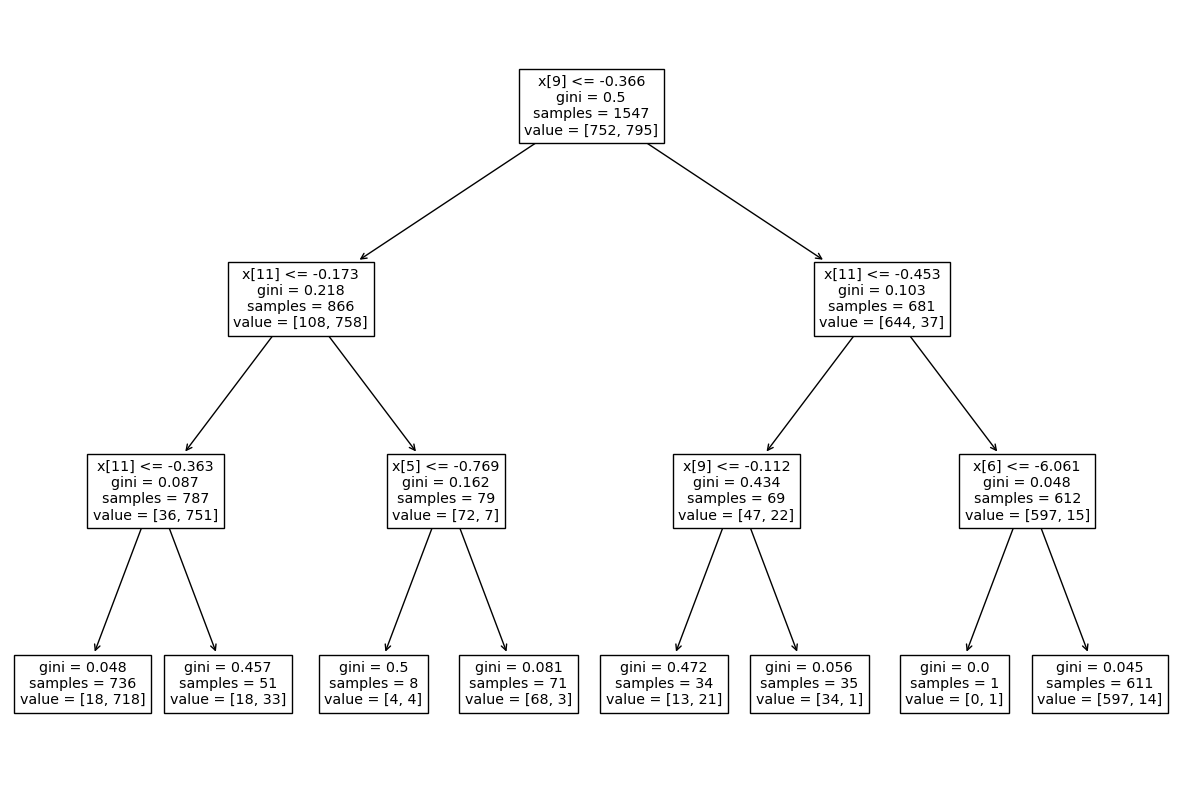

In [105]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))

plot_tree(best_model)

In [106]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
param_grid_neigbors = {
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10,20,30]
}
best_model,best_params = GridSearchBestModel(model,param_grid_neigbors,X,Y)
results['KNeighbors'] = ConfusionMatrix(y_out,best_model.predict(X_new))

In [107]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
param_grid_logistic = {
    'C': [1, 10],
    'solver': ['liblinear', 'saga'],  
    'penalty': ['l1', 'l2'],  
    'max_iter': [100, 1000], 
    'fit_intercept': [True],  
    'class_weight': ['balanced', None] 
}
best_model,best_params = GridSearchBestModel(model,param_grid_logistic,X,Y)
results['LogisticRegression'] = ConfusionMatrix(y_out,best_model.predict(X_new))

c:\Users\mmd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mmd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mmd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mmd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mmd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did 

In [108]:
def RandomForst(model):
    model.fit(X, Y)
    return ConfusionMatrix(y_out,model.predict(X_new))

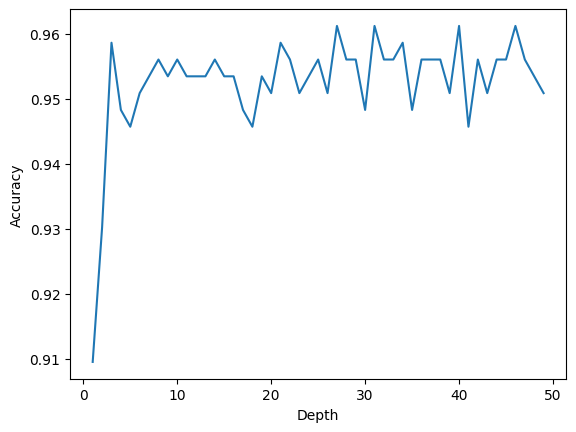

In [109]:
from sklearn.ensemble import RandomForestClassifier

max_depth_change = []

for max_depth in range(1,50):
    model = RandomForestClassifier(max_depth=max_depth)
    max_depth_change.append((max_depth,RandomForst(model)))

x = [t[0] for t in max_depth_change] 
y = [t[1] for t in max_depth_change]

plt.plot(x,y)
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.show()

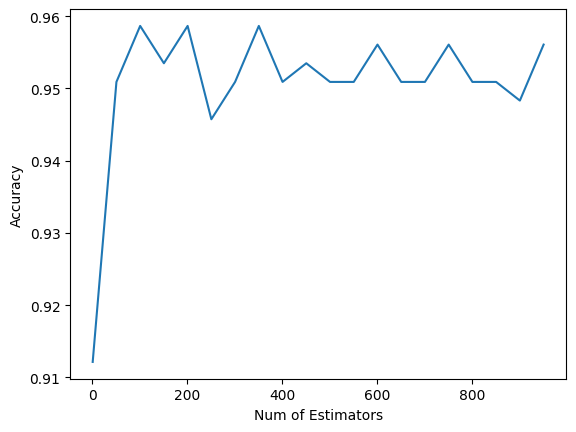

In [110]:
n_estimators_change = []

for num in range(1,1000,50):
    model = RandomForestClassifier(n_estimators=num)
    n_estimators_change.append((num,RandomForst(model)))

x = [t[0] for t in n_estimators_change] 
y = [t[1] for t in n_estimators_change]

plt.plot(x,y)
plt.xlabel("Num of Estimators")
plt.ylabel("Accuracy")
plt.show()

In [111]:
model = RandomForestClassifier()
param_random_forst = {
    'n_estimators': [50,100,150,200],
    'max_depth': [1,3,5,6,7,10],
   
}
best_model,best_params = GridSearchBestModel(model,param_random_forst,X,Y)
results['RandomForest'] = ConfusionMatrix(y_out,best_model.predict(X_new))

In [112]:
privacy_features = ['Year_Birth', 'Income', 'Recency', 'MntCoffee', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebVisitsMonth', 'NumPurchases']
noise_df = copy.deepcopy(new_df)
noise = np.random.laplace(loc=0, scale=0.05, size=(noise_df.shape[0], len(privacy_features)))
noise_df[privacy_features] += noise

In [113]:
noisy_df_copy = copy.deepcopy(noise_df)
noisy_df_copy['Education'] = (noisy_df_copy['Education'] - noisy_df_copy['Education'].min()) / (noisy_df_copy['Education'].max() - noisy_df_copy['Education'].min())
noisy_df_copy['Income'] = (noisy_df_copy['Income'] - noisy_df_copy['Income'].min()) / (noisy_df_copy['Income'].max() - noisy_df_copy['Income'].min())
noisy_df_copy['Year_Birth'] = (noisy_df_copy['Year_Birth'] - noisy_df_copy['Year_Birth'].min()) / (noisy_df_copy['Year_Birth'].max() - noisy_df_copy['Year_Birth'].min())
noisy_df_copy['Kidhome'] = (noisy_df_copy['Kidhome'] - noisy_df_copy['Kidhome'].min()) / (noisy_df_copy['Kidhome'].max() - noisy_df_copy['Kidhome'].min())
noisy_df_copy['Teenhome'] = (noisy_df_copy['Teenhome'] - noisy_df_copy['Teenhome'].min()) / (noisy_df_copy['Teenhome'].max() - noisy_df_copy['Teenhome'].min())
noisy_df_copy['Recency'] = (noisy_df_copy['Recency'] - noisy_df_copy['Recency'].min()) / (noisy_df_copy['Recency'].max() - noisy_df_copy['Recency'].min())
noisy_df_copy['MntCoffee'] = (noisy_df_copy['MntCoffee'] - noisy_df_copy['MntCoffee'].min()) / (noisy_df_copy['MntCoffee'].max() - noisy_df_copy['MntCoffee'].min())
noisy_df_copy['MntFruits'] = (noisy_df_copy['MntFruits'] - noisy_df_copy['MntFruits'].min()) / (noisy_df_copy['MntFruits'].max() - noisy_df_copy['MntFruits'].min())
noisy_df_copy['MntMeatProducts'] = (noisy_df_copy['MntMeatProducts'] - noisy_df_copy['MntMeatProducts'].min()) / (noisy_df_copy['MntMeatProducts'].max() - noisy_df_copy['MntMeatProducts'].min())
noisy_df_copy['MntFishProducts'] = (noisy_df_copy['MntFishProducts'] - noisy_df_copy['MntFishProducts'].min()) / (noisy_df_copy['MntFishProducts'].max() - noisy_df_copy['MntFishProducts'].min())
noisy_df_copy['MntSweetProducts'] = (noisy_df_copy['MntSweetProducts'] - noisy_df_copy['MntSweetProducts'].min()) / (noisy_df_copy['MntSweetProducts'].max() - noisy_df_copy['MntSweetProducts'].min())
noisy_df_copy['MntGoldProds'] = (noisy_df_copy['MntGoldProds'] - noisy_df_copy['MntGoldProds'].min()) / (noisy_df_copy['MntGoldProds'].max() - noisy_df_copy['MntGoldProds'].min())
noisy_df_copy['NumWebVisitsMonth'] = (noisy_df_copy['NumWebVisitsMonth'] - noisy_df_copy['NumWebVisitsMonth'].min()) / (noisy_df_copy['NumWebVisitsMonth'].max() - noisy_df_copy['NumWebVisitsMonth'].min())
noisy_df_copy['NumPurchases'] = (noisy_df_copy['NumPurchases'] - noisy_df_copy['NumPurchases'].min()) / (noisy_df_copy['NumPurchases'].max() - noisy_df_copy['NumPurchases'].min())


In [114]:
num_purchases_median = noisy_df_copy['NumPurchases'].median()
noisy_df_copy['PurchaseRate'] = ['HIGH' if x > num_purchases_median else 'LOW' for x in noisy_df_copy['NumPurchases']]

In [115]:
train_size = 0.8
random_state = 3

noisy_train_df, noisy_test_df = train_test_split(noisy_df_copy, train_size=train_size, random_state=random_state)
print(noisy_train_df.info())
print(noisy_test_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1547 entries, 1935 to 2198
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   I                  1547 non-null   int64  
 1   ID                 1547 non-null   int64  
 2   Year_Birth         1547 non-null   float64
 3   Education          1547 non-null   object 
 4   Marital_Status     1547 non-null   object 
 5   Income             1547 non-null   float64
 6   Kidhome            1547 non-null   float64
 7   Teenhome           1547 non-null   float64
 8   Recency            1547 non-null   float64
 9   MntCoffee          1547 non-null   float64
 10  MntFruits          1547 non-null   float64
 11  MntMeatProducts    1547 non-null   float64
 12  MntFishProducts    1547 non-null   float64
 13  MntSweetProducts   1547 non-null   float64
 14  MntGoldProds       1547 non-null   float64
 15  NumWebVisitsMonth  1547 non-null   float64
 16  Complain           1547 no

In [116]:
X = noisy_train_df.drop(['PurchaseRate','NumPurchases'], axis=1)
Y = noisy_train_df['PurchaseRate']
X_new = noisy_test_df.drop(['PurchaseRate','NumPurchases'], axis=1)  
y_out = noisy_test_df['PurchaseRate']

In [117]:
noisy_res = {}
model = DecisionTreeClassifier()
param_grid_decision = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 5, 8, 10],
}
best_model,best_params = GridSearchBestModel(model,param_grid_decision,X,Y)
noisy_res['DecisionTree'] = ConfusionMatrix(y_out,best_model.predict(X_new))

[Text(0.37037037037037035, 0.9166666666666666, 'x[9] <= 0.124\ngini = 0.5\nsamples = 1547\nvalue = [776, 771]'),
 Text(0.18518518518518517, 0.75, 'x[11] <= 0.134\ngini = 0.112\nsamples = 702\nvalue = [42, 660]'),
 Text(0.1111111111111111, 0.5833333333333334, 'x[12] <= 0.259\ngini = 0.038\nsamples = 664\nvalue = [13, 651]'),
 Text(0.07407407407407407, 0.4166666666666667, 'x[9] <= 0.09\ngini = 0.024\nsamples = 654\nvalue = [8, 646]'),
 Text(0.037037037037037035, 0.25, 'gini = 0.0\nsamples = 565\nvalue = [0, 565]'),
 Text(0.1111111111111111, 0.25, 'x[13] <= 0.122\ngini = 0.164\nsamples = 89\nvalue = [8, 81]'),
 Text(0.07407407407407407, 0.08333333333333333, 'gini = 0.056\nsamples = 70\nvalue = [2, 68]'),
 Text(0.14814814814814814, 0.08333333333333333, 'gini = 0.432\nsamples = 19\nvalue = [6, 13]'),
 Text(0.14814814814814814, 0.4166666666666667, 'gini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25925925925925924, 0.5833333333333334, 'x[10] <= 0.205\ngini = 0.361\nsamples = 38\nvalue = [

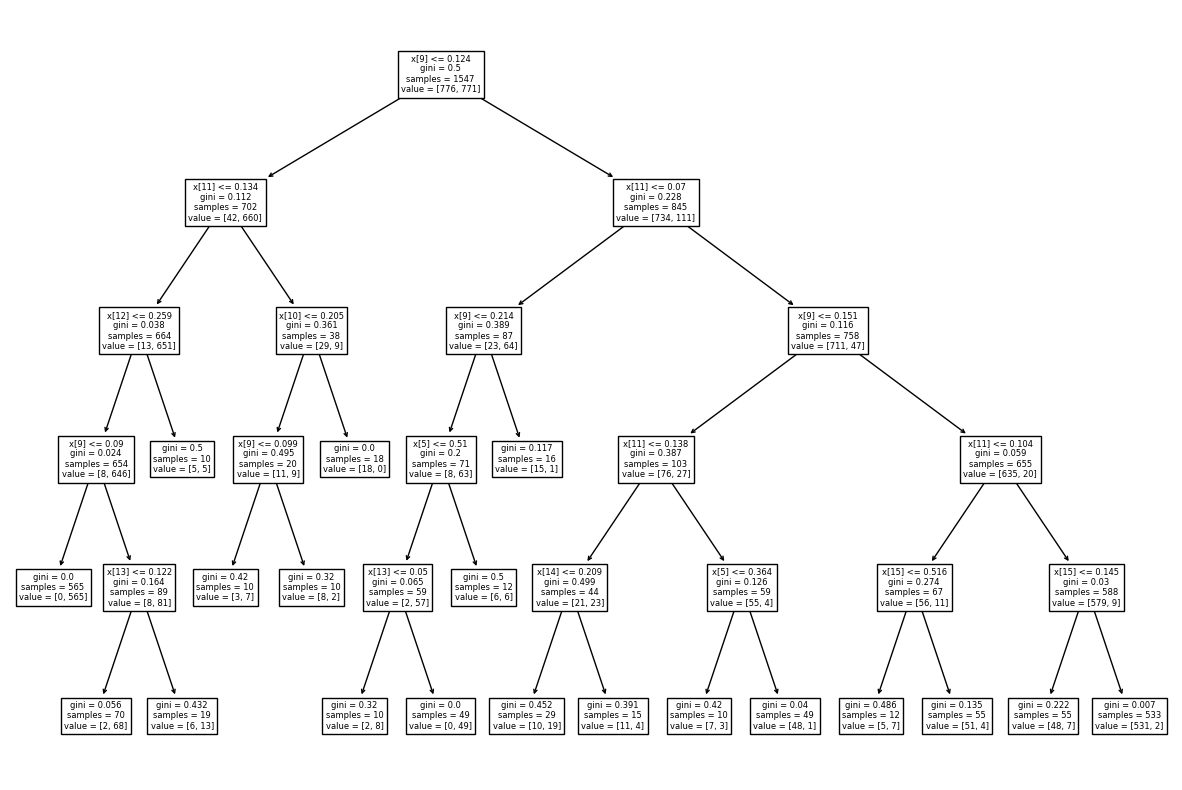

In [118]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(best_model)

In [119]:
model = KNeighborsClassifier()
param_grid_neigbors = {
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10,20,30]
}

best_model,best_params = GridSearchBestModel(model,param_grid_neigbors,X,Y)
noisy_res['KNeighbors'] = ConfusionMatrix(y_out,best_model.predict(X_new))

In [120]:
model = LogisticRegression()
param_grid_logistic = {
    'C': [1,10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 1000]
}
best_model,best_params = GridSearchBestModel(model,param_grid_logistic,X,Y)
noisy_res['LogisticRegression'] = ConfusionMatrix(y_out,best_model.predict(X_new))

c:\Users\mmd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mmd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mmd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mmd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\mmd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did 

In [121]:
model = RandomForestClassifier()
param_random_forst = {
    'n_estimators': [50,100,150,200],
    'max_depth': [1,3,5,6,7,10],
   
}
best_model,best_params = GridSearchBestModel(model,param_random_forst,X,Y)
noisy_res['RandomForest'] = ConfusionMatrix(y_out,best_model.predict(X_new))

In [122]:
accuracy_list = {'Accuracy without noise' : results,'Noise accuracy' : noisy_res}

In [123]:
accuracy_df = pd.DataFrame(accuracy_list).T
display(accuracy_df)

,DecisionTree,KNeighbors,LogisticRegression,RandomForest
Accuracy without noise,0.940568,0.454780,0.958656,0.948320
Noise accuracy,0.953488,0.465116,0.961240,0.956072


## Q19:<br>
The presented models have all performed very well, but based on the preparations made on the data, we got a slightly better result on the RandomForest model. It is only the KNeighbors model that had a weaker performance by a margin

## Q21:<br>
Over Fitting : This means that our built model is too dependent on the train data and cannot
New data should perform well. This phenomenon usually occurs when the model is very complex and tries to even noise
Also learn train data.<br>
Under fitting : That is, the model could not learn the important relationships and patterns in the data correctly. This phenomenon usually happens when: Underfitting
It happens that the model is too simple and does not have enough flexibility to model the data.

## Q24:
max_leaf_nodes: Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity.<br>
n_estimators: This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees give you better performance but makes your code slower.

## Q25:<br>
Bias : It shows how far the model's predictions are from the actual value or wrong. And high bias means that the predictions of the model are far from the correct value.<br>
Variace : It shows how much the model predictions differ between different train sets. High variance means that predictions change significantly based on small changes in the data.<br>
Considering that the random forest model improves its results from several decision trees and takes an average from them, it is expected that it will have less bias in the end because the bias is the average bias of a large number of trees, and in the same way, the variance will be less.<br>
The results obtained in the code confirm the assumptions of our theory


## Q26:<br>
Adding noise to the data in different rows of a dataset can have a positive effect on maintaining security and privacy
have people Because this makes it more difficult to identify people from the data. Of course, it should be kept in mind that
Adding noise to the data can also have a negative effect. For example, if the noise is too loud, it may cause
that the data becomes unusable.


## Q27:
Because the Laplace noise creates noise using the Laplace distribution, it causes the data to change more and the issue of maintaining security
And privacy is more respected, but on the other hand, it causes our data to get into trouble and probably reduce our accuracy
find Exponential noise uses exponential distribution to create noise, and privacy and security issues are less respected
The data remains almost intact, which means our accuracy does not decrease much.

## Q29:<br>
In short, boosting trees teach several decision trees instead of one decision tree, each tree tries to minimize the error of its previous trees, and with the help of a weighted brain, the exact result of a simple decision tree is obtained from these trees.

In [124]:
new_df['PurchaseRate'] = new_df['PurchaseRate'].replace('HIGH',1)
new_df['PurchaseRate'] = new_df['PurchaseRate'].replace('LOW',0)
new_df['Marital_Status'] = new_df['Marital_Status'].astype(float)
new_df['Education'] = new_df['Education'].astype(float)


In [125]:
train_size = 0.8
random_state = 3

xgb_train_df, xgb_test_df = train_test_split(new_df, train_size=train_size, random_state=random_state)
print(xgb_train_df.info())
print(xgb_test_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1547 entries, 1935 to 2198
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   I                  1547 non-null   int64  
 1   ID                 1547 non-null   int64  
 2   Year_Birth         1547 non-null   int64  
 3   Education          1547 non-null   float64
 4   Marital_Status     1547 non-null   float64
 5   Income             1547 non-null   float64
 6   Kidhome            1547 non-null   float64
 7   Teenhome           1547 non-null   float64
 8   Recency            1547 non-null   float64
 9   MntCoffee          1547 non-null   float64
 10  MntFruits          1547 non-null   float64
 11  MntMeatProducts    1547 non-null   float64
 12  MntFishProducts    1547 non-null   float64
 13  MntSweetProducts   1547 non-null   float64
 14  MntGoldProds       1547 non-null   float64
 15  NumWebVisitsMonth  1547 non-null   float64
 16  Complain           1547 no

In [126]:

X = xgb_train_df.drop(['PurchaseRate','NumPurchases'], axis=1)
Y = xgb_train_df['PurchaseRate']
X_new = xgb_test_df.drop(['PurchaseRate','NumPurchases'], axis=1)  
y_out = xgb_test_df['PurchaseRate']
display(X)
display(X_new)

,I,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoffee,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Complain,UsedCampaignOffer
1935,1935,1403,1975,2.0,2.0,-0.690831,0.874004,0.844387,-0.313768,-0.799266,-0.512035,-0.640689,-0.600251,-0.490792,-0.813457,1.115729,0,0
144,144,9701,1988,3.0,2.0,-0.349320,0.874004,-0.990495,-1.247613,-0.419661,0.535728,-0.485656,1.188242,-0.092292,2.100401,0.654065,0,0
1143,1143,8414,1962,5.0,1.0,-0.768301,-0.859661,0.844387,0.931360,-0.642188,-0.651737,-0.658577,-0.676900,-0.671928,-0.426661,0.654065,0,0
571,571,3526,1968,5.0,3.0,-0.519605,0.874004,0.844387,0.308796,-0.720727,-0.651737,-0.700317,-0.676900,-0.671928,-0.865029,0.654065,0,0
871,871,9353,1959,3.0,1.0,0.668778,-0.859661,0.844387,0.412557,0.859869,0.989759,0.861935,0.907193,1.719073,0.089066,-1.192594,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,1101,10552,1979,2.0,3.0,0.260885,-0.859661,0.844387,-1.074679,-0.596374,1.234237,-0.080186,1.367091,-0.345883,0.269570,-0.269265,0,0
1926,1926,10872,1969,5.0,3.0,0.310486,-0.859661,0.844387,0.550904,2.784072,-0.651737,-0.461805,-0.676900,-0.671928,-0.014080,1.115729,0,1
1459,1459,2525,1974,5.0,3.0,-0.521239,-0.859661,-0.990495,0.550904,-0.324760,1.583491,0.003293,2.286887,1.646619,-0.529807,0.192400,0,1
1949,1949,9955,1954,3.0,2.0,-0.447580,-0.859661,0.844387,-1.005505,-0.599646,-0.372333,-0.575098,-0.370302,-0.418337,-0.581380,-0.730929,0,0


,I,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntCoffee,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Complain,UsedCampaignOffer
228,228,460,1972,5.0,3.0,1.534065,-0.859661,-0.990495,0.793012,1.766339,2.351851,3.682335,1.034943,1.175664,-0.452448,-1.654258,0,0
177,177,10854,1970,5.0,3.0,-1.214713,0.874004,0.844387,1.415576,-0.730544,-0.651737,-0.646651,-0.676900,-0.671928,-0.839243,0.654065,0,0
1801,1801,6977,1974,3.0,2.0,1.324772,-0.859661,0.844387,1.311815,2.685898,-0.651737,3.020465,3.027834,0.668482,0.063279,0.654065,0,1
1994,1994,4547,1960,3.0,2.0,-1.745807,0.874004,0.844387,1.277228,-0.805811,-0.581886,-0.676465,-0.625801,-0.635701,-0.761884,1.115729,0,0
669,669,7426,1971,2.0,3.0,0.284646,0.874004,0.844387,0.931360,-0.462203,-0.092930,-0.509507,-0.498051,-0.345883,-0.426661,-1.192594,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520,1520,4278,1983,5.0,1.0,1.893347,-0.859661,-0.990495,0.827599,2.152488,3.224987,3.586930,0.575044,2.008892,0.527434,-1.192594,0,1
1523,1523,10795,1973,5.0,3.0,-0.571186,0.874004,-0.990495,-1.213026,-0.763269,-0.546961,-0.616837,-0.600251,-0.635701,-0.813457,0.654065,0,0
39,39,2968,1943,5.0,4.0,0.000408,-0.859661,-0.990495,0.135862,0.604617,-0.372333,0.498204,3.411083,1.103209,0.192211,0.192400,0,1
973,973,6357,1959,2.0,4.0,0.500572,-0.859661,0.844387,-0.694223,-0.072781,0.570654,-0.282921,0.932743,1.393028,-0.091439,-0.269265,0,0


In [127]:
import xgboost as xgb
train_data = xgb.DMatrix(X, label=Y)
test_data = xgb.DMatrix(X_new, label=y_out)
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "max_depth": 3
}
model = xgb.train(params, train_data)
y_predict = model.predict(test_data)
y_predict = (y_predict >= 0.5).astype(int)
print('Accuracy : ',ConfusionMatrix(y_out,y_predict))

Accuracy :  0.9405684754521964


In [128]:
param_grid_XGboost = {
    "objective": ["binary:logistic"],
    "eval_metric": ["logloss"],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': [100, 500, 1000] 
}
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=param_grid_XGboost)                       
grid_search.fit(X, Y) 
y_prediction = grid_search.predict(X_new)
print('Accuracy : ',ConfusionMatrix(y_out, y_prediction))

Accuracy :  0.9560723514211886
